<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">Table of content</p>

## Table of content
1. Data description
2. Importing libraries, loading the data and defining user functions
3. First look and explore data
4. Data Visualization
5. Data Preprocessing
    * Null values preprocessing
    * Outliers preprocessing
6. Encoding (converting categorical data into numerical data)
7. Split data
8. Data Scaling using Robust Scaler
9. Modeling
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * GBM (Gradient Boosting)
    * XGBM (Extreme Gradient Boosting)
    * Adaboost
* Comparison between all models scores 
10. Imbalanced data (processed by 3 different techniques)
    * Random Undersampling
    * Random Oversampling
    * SMOTE
11. Modeling
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * GBM (Gradient Boosting)
    * XGBM (Extreme Gradient Boosting)
    * Adaboost
12. Final comparison of all the models
    



<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">1. Data description</p>

* <b>ID:</b> Unique passenger identifier.
* <b>Gender:</b> Gender of the passenger (Female/Male)
* <b>Age: </b>Age of the passenger 
* <b>Customer Type:</b> Type of airline customer (First-time/Returning)
* <b>Type of Travel:</b> Purpose of the flight (Business/Personal)
* <b>Class:</b> Travel class in the airplane for the passenger seat
* <b>Flight Distance:</b> Flight distance in miles
* <b>Departure Delay:</b> Flight departure delay in minutes
* <b>Arrival Delay:</b> Flight arrival delay in minutes
* <b>Departure and Arrival Time Convenience:</b> Satisfaction level of Departure/Arrival time convenient from 1 to 5
* <b>Ease of Online Booking: </b>Satisfaction level of online booking from 1 to 5
* <b>Check-in Service: </b>Satisfaction level of Check-in service from 1 to 5
* <b>Online Boarding: </b>Satisfaction level of online boarding from 1 to 5
* <b>Gate Location: </b>Satisfaction level with the gate location in the airport from 1 to 5
* <b>On-board Service: </b>Satisfaction level with the on-boarding service in the airport from 1 to 5
* <b>Seat Comfort: </b>Satisfaction level with the comfort of the airplane seat from 1 to 5
* <b>Leg Room Service: </b>Satisfaction level with the leg room of the airplane seat from 1 to 5
* <b>Cleanliness: </b>Satisfaction level with the cleanliness of the airplane from 1 to 5
* <b>Food and Drink: </b>Satisfaction level with the food and drinks on the airplane from 1 to 5
* <b>In-flight Service: </b>Satisfaction level with the in-flight service from 1 to 5
* <b>In-flight Wifi Service: </b>Satisfaction level with the in-flight Wifi service from 1 to 5
* <b>In-flight Entertainment: </b> Satisfaction level with the in-flight entertainment from 1 to 5
* <b>Baggage Handling: </b>Satisfaction level with the baggage handling from the airline from 1 to 5
* <b>Satisfaction: </b>Overall satisfaction level with the airline (Satisfied/Neutral or unsatisfied)

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">2. Importing libraries, loading the data and defining user functions</p>

In [1]:
## install these before running below 

# !pip install imblearn
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
# !pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from tabulate import tabulate



In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 

import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
warnings.filterwarnings('ignore')
import scikitplot as skplt
#!pip install scikit-plot
#!pip install imbalanced-learn
#!pip install vecstack

In [4]:
#function to return categorical variables
def return_categorical(df):

    categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
    return categorical_columns

#this function returns numerical variables
def return_numerical(df):

    return list(set(df.columns) - set(return_categorical(df)))


def check_normal(df):
    fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

    for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

        sns.distplot(df[numeric_column_name], ax=axes[i]);
        plt.title(f'Distribution of {numeric_column_name}');
    
def classifier(clf, x_train,x_test,y_train,y_test,output_name):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred,)  # multi_class='ovr'  (taken outside temporarily)
    roc_train = roc_auc_score(y_train, y_train_pred, ) #multi_class='ovr'
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F1 score of {} is: {}".format(clf,f1) )
    print("Precision of {} is: {}".format(clf,precision))
    print("Recall of {} is: {}".format(clf,recall))
    print('confusion matrix of {} is: '.format(clf))
    skplt.metrics.plot_confusion_matrix(y_test, y_test_pred,title='Confusion Matrix of best estimator model');
    print()
    print()
    get_params=clf.get_params
    print('best features are of model are: {}'.format(get_params))  #best_estimator_
    
    return accuracy_test,f1, precision, recall, roc_test
    
    
def grid_search(clf,params, x_train,x_test,y_train,y_test):   # add output name if there is submission file
    
    grid_search = GridSearchCV(estimator= clf, param_grid=params, scoring='roc_auc',n_jobs=-1, cv=3,verbose=10) # verbose=3,
    grid_search.fit(x_train, y_train)
    optimal_model = grid_search.best_estimator_

    
    print("Best parameters are: ", grid_search.best_params_)
    print()
    print("Best estimator is: ", grid_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
#     print()
    accuracy_test,f1, precision, recall, roc_test=classifier(optimal_model, x_train,x_test,y_train,y_test)
    return accuracy_test,f1, precision, recall, roc_test

def random_search(clf,params, x_train,x_test,y_train,y_test,output_name):   # output name created for submission file
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=3,n_jobs=-1,verbose=10)
    random_search.fit(x_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
#     print()
#     classifier(optimal_model, x_train,x_test,y_train,y_test)
    accuracy_test,f1, precision, recall, roc_test=classifier(optimal_model, x_train,x_test,y_train,y_test,output_name)
    return accuracy_test,f1, precision, recall, roc_test


In [5]:
new_data =pd.read_csv('airline_passenger_satisfaction.csv',encoding='utf-8')

In [6]:
new_data.shape

(129880, 24)

In [7]:
data = pd.read_csv("airline_passenger_satisfaction.csv" , encoding = "utf-8")

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">3. First look and exploring the data</p>

In [8]:
nr, nc = data.shape
print (f"There are {nr} rows and {nc} columns")

There are 129880 rows and 24 columns


In [9]:
data.size
print (f"There are {data.size} atributes in data")

There are 3117120 atributes in data


In [10]:
data.columns
#There are many columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [11]:
new_data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">3.1 Show data</p>

In [12]:
data

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">3.2 The mean, median, summary, etc of the data</p>

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129487.0,15.091129,38.465650,0.0,0.00,0.0,13.00,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.00,3.0,4.00,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">3.3 Check the uniqueness of the data</p>

In [14]:
data.nunique()

ID                                        129880
Gender                                         2
Age                                           75
Customer Type                                  2
Type of Travel                                 2
Class                                          3
Flight Distance                             3821
Departure Delay                              466
Arrival Delay                                472
Departure and Arrival Time Convenience         6
Ease of Online Booking                         6
Check-in Service                               6
Online Boarding                                6
Gate Location                                  6
On-board Service                               6
Seat Comfort                                   6
Leg Room Service                               6
Cleanliness                                    6
Food and Drink                                 6
In-flight Service                              6
In-flight Wifi Servi

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">3.4 Check duplication of data</p>

In [15]:
data.duplicated().sum()

0

### There is no duplicate data

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">3.5 Checking the data types</p>

In [16]:
data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">4. Data Visualization</p>

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">4.1 Checking for correlations(relationships) between the data</p>

<AxesSubplot:>

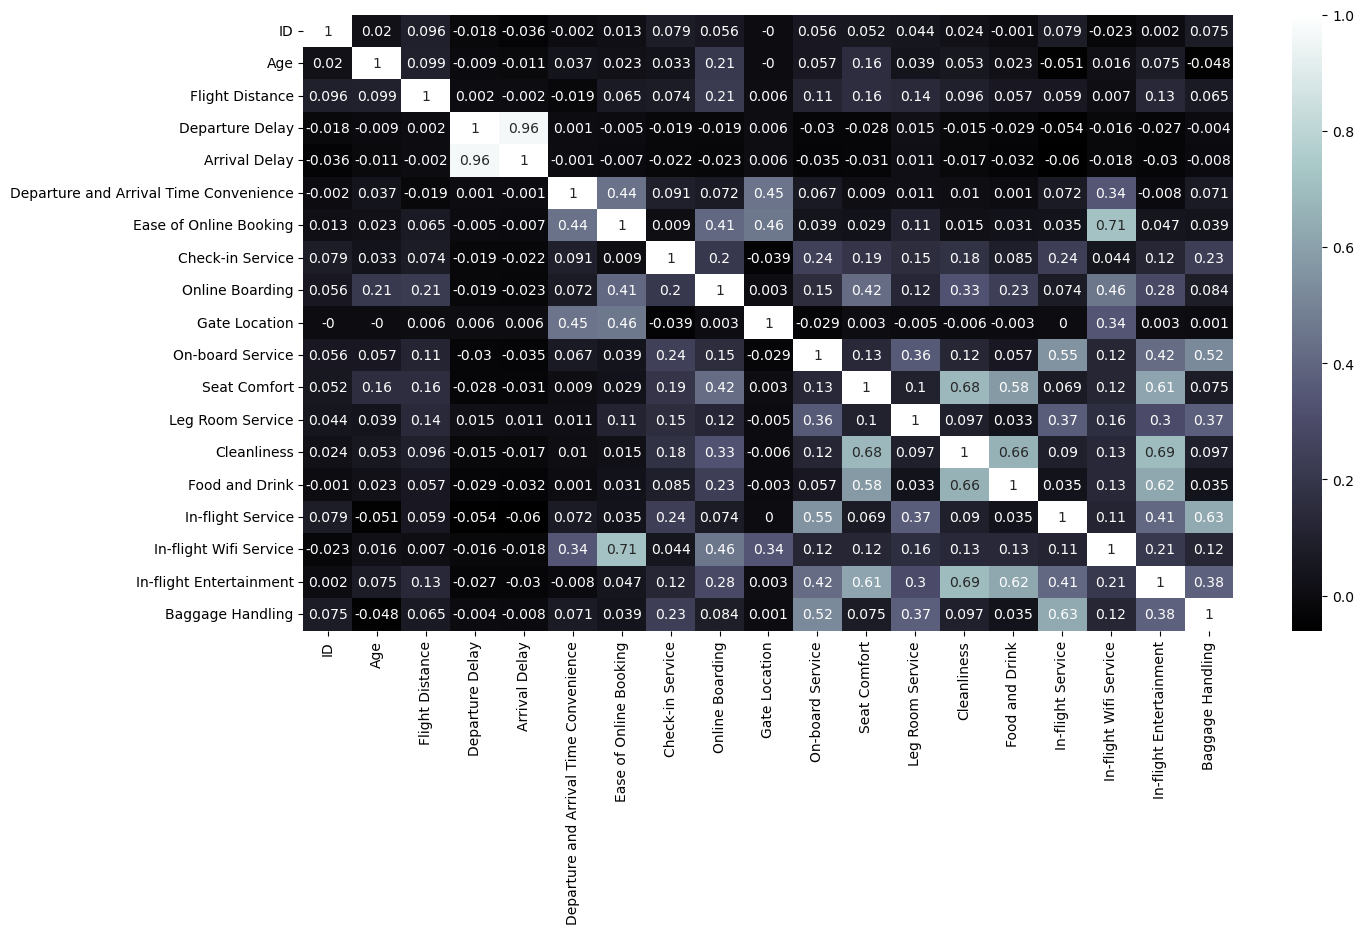

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(round(data.corr(),3), annot = True,cmap = "bone")

#### There is a strong relation between(above 50% only)(From the strongest to the weakest ):-
* In-flight Wifi Service & Ease of Online Booking
* In-flight Entertainment & Cleanliness 
* Cleanliness & Seat Comfort
* Food and Drink & Cleanliness
* Baggage Handling & In-flight Wifi Service
* In-flight Entertainment & Food and Drink
* In-flight Entertainment & Seat Comfort
* Food and Drink & Seat Comfort
* In-flight Service & On-board Service
* Baggage Handling & On-board Service

In [18]:
# unique features for feature instances graph
ct=['Leg Room Service','Class','On-board Service','In-flight Wifi Service','Online Boarding','Customer Type','Type of Travel'
    ,'Flight Distance','Check-in Service','In-flight Entertainment','Seat Comfort','Departure and Arrival Time Convenience',
    'In-flight Service']
for columns in new_data:
    print()
    print('column name : {} and values are: {}'.format(columns,new_data[columns].sort_values().unique()))


column name : ID and values are: [     1      2      3 ... 129878 129879 129880]

column name : Gender and values are: ['Female' 'Male']

column name : Age and values are: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 79 80 85]

column name : Customer Type and values are: ['First-time' 'Returning']

column name : Type of Travel and values are: ['Business' 'Personal']

column name : Class and values are: ['Business' 'Economy' 'Economy Plus']

column name : Flight Distance and values are: [  31   56   67 ... 4817 4963 4983]

column name : Departure Delay and values are: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48  

column name : Satisfaction and values are: ['Neutral or Dissatisfied' 'Satisfied']


In [19]:
for columns in new_data:
    print()
    print('column name : {} and values are: {}'.format(columns,new_data[columns].sort_values().unique()))


column name : ID and values are: [     1      2      3 ... 129878 129879 129880]

column name : Gender and values are: ['Female' 'Male']

column name : Age and values are: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 79 80 85]

column name : Customer Type and values are: ['First-time' 'Returning']

column name : Type of Travel and values are: ['Business' 'Personal']

column name : Class and values are: ['Business' 'Economy' 'Economy Plus']

column name : Flight Distance and values are: [  31   56   67 ... 4817 4963 4983]

column name : Departure Delay and values are: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48  

column name : Satisfaction and values are: ['Neutral or Dissatisfied' 'Satisfied']


In [20]:
for columns in new_data:
    print()
    print('column name : {} and values are: {}'.format(columns,new_data[columns].value_counts()))


column name : ID and values are: 1         1
86583     1
86596     1
86595     1
86594     1
         ..
43289     1
43288     1
43287     1
43286     1
129880    1
Name: ID, Length: 129880, dtype: int64

column name : Gender and values are: Female    65899
Male      63981
Name: Gender, dtype: int64

column name : Age and values are: 39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64

column name : Customer Type and values are: Returning     106100
First-time     23780
Name: Customer Type, dtype: int64

column name : Type of Travel and values are: Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

column name : Class and values are: Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64

column name : Flight Distance and values are: 337     841
594     505
404     480
862     473
2475    470
       ... 
1492      1
815     

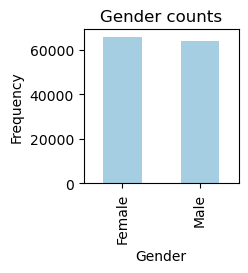

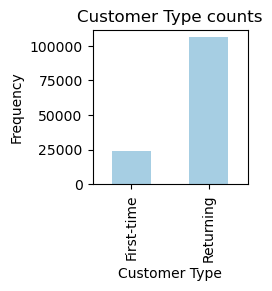

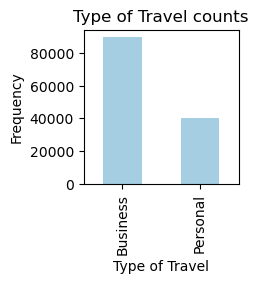

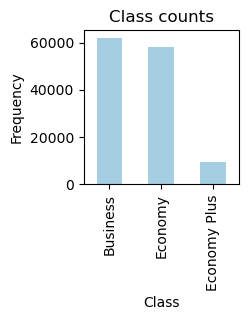

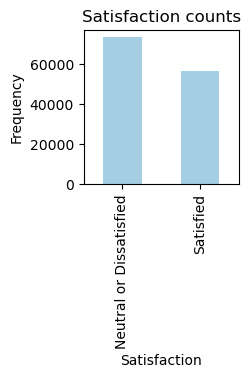

In [21]:
# plotting graphs for all categorical columns
for col in return_categorical(new_data):
    counts = new_data[col].value_counts().sort_index()
    if len(counts) > 10:
        fig = plt.figure(figsize=(2, 2))
    else:
        fig = plt.figure(figsize=(2, 2))
    ax = fig.gca()
    counts.plot.bar(ax = ax, colormap='Paired',) #label=col
#     ax = df.T.plot(kind='bar', label=col, colormap='Paired')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">4.2 Showing the distribution of categorical data</p>

In [22]:
#categorical data
return_categorical(new_data)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [23]:
#numerical data
return_numerical(new_data)

['Departure and Arrival Time Convenience',
 'Flight Distance',
 'Online Boarding',
 'Baggage Handling',
 'Arrival Delay',
 'ID',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Age',
 'Leg Room Service',
 'On-board Service',
 'Food and Drink',
 'Check-in Service',
 'Departure Delay',
 'In-flight Service',
 'Cleanliness',
 'Seat Comfort',
 'Ease of Online Booking',
 'Gate Location']

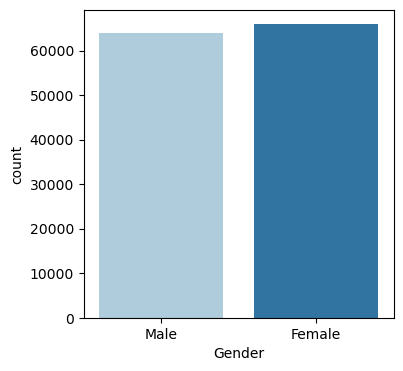

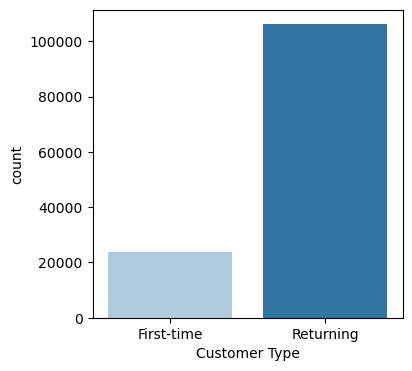

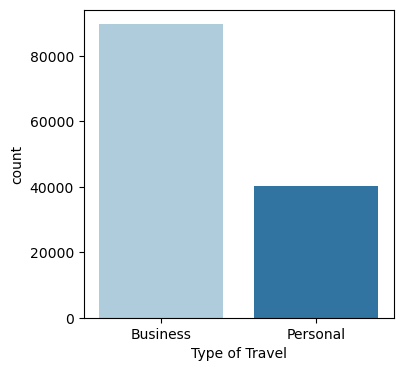

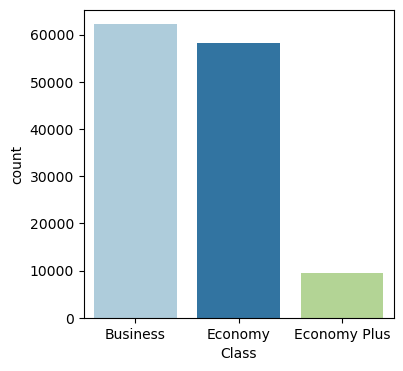

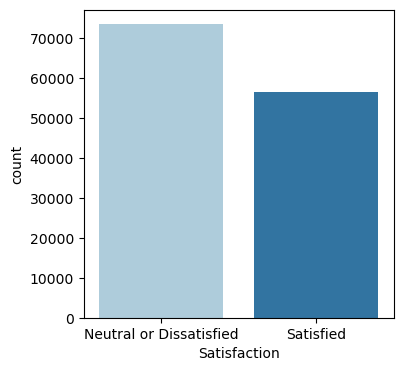

In [24]:
#These are the Object data
ColObj= ['Gender', 'Customer Type','Type of Travel','Class','Satisfaction'  ]
for col in ColObj:
    plt.figure(figsize=(4,4))
    sns.countplot(x=col,data=data, palette="Paired")
    plt.show()


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">4.3 Showing the disctribution of numerical data</p>

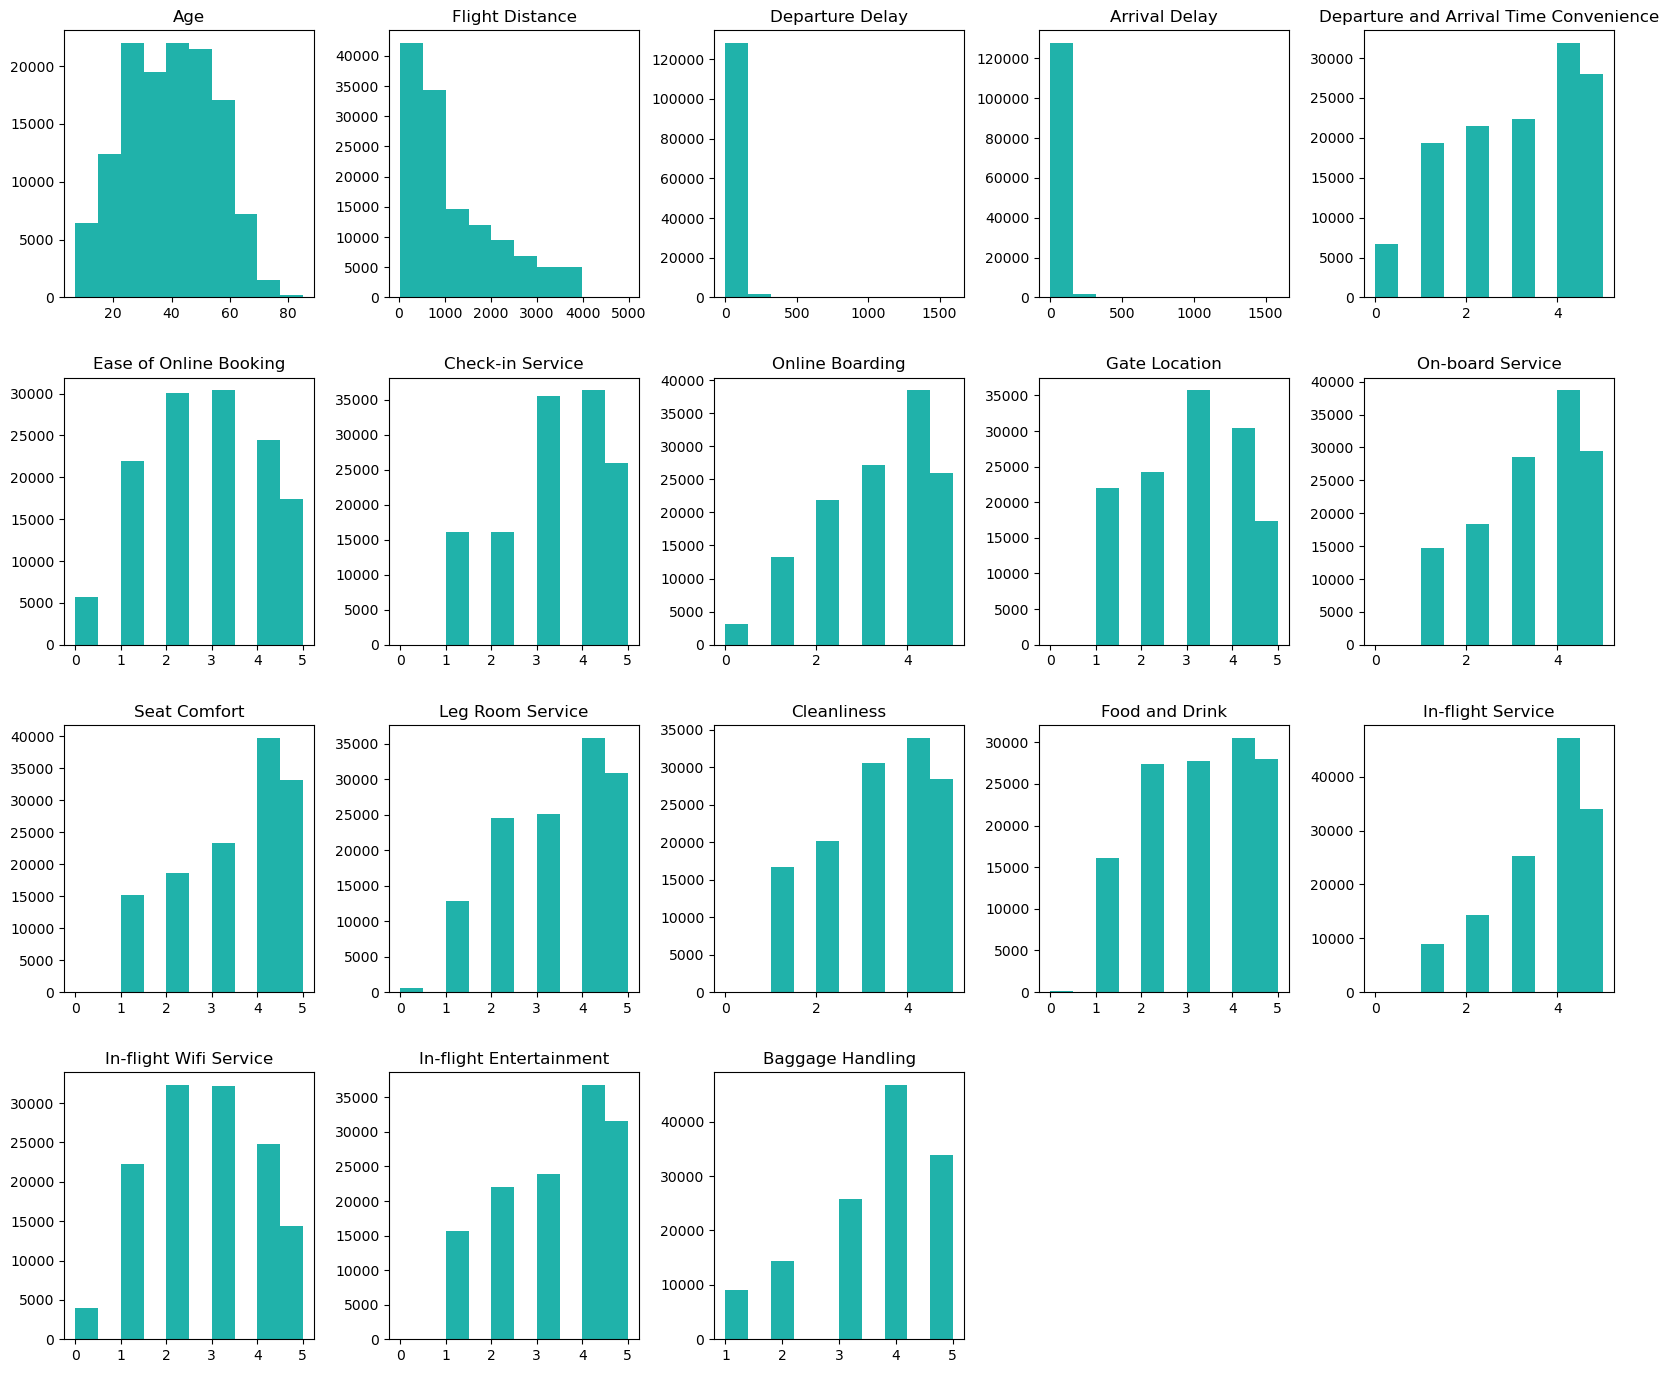

In [25]:
data.hist(bins = 10 , layout = (4,5), figsize = (20,17)  ,column = data.columns[1:], color= "LightSeaGreen", grid = False)
plt.show()

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">4.4 Comparing with the Target data(Satisfaction)</p>

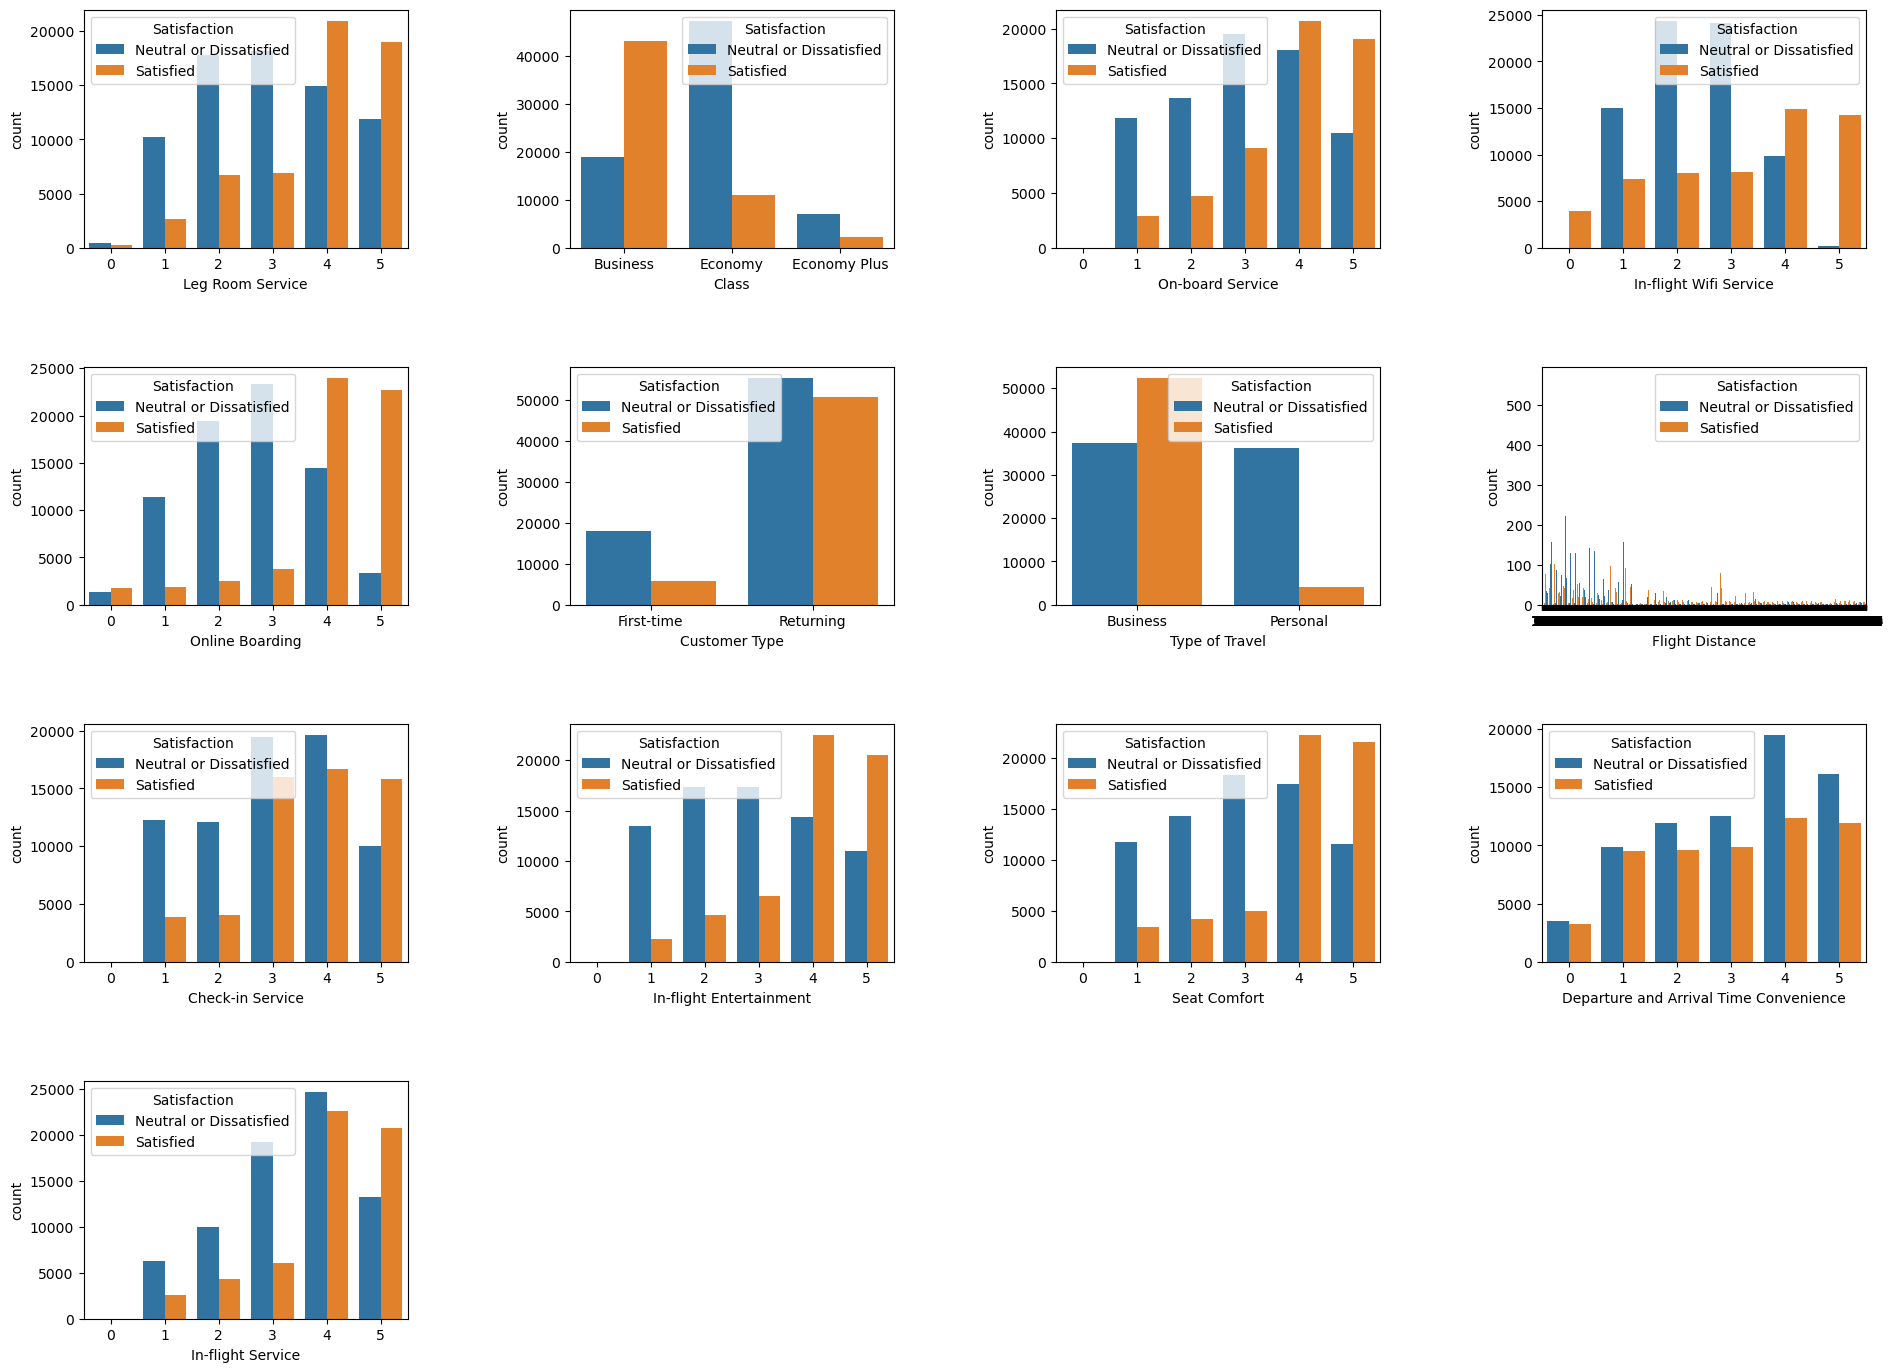

In [26]:
#List of features from the feature instances of  ML models
ct=['Leg Room Service','Class','On-board Service','In-flight Wifi Service','Online Boarding','Customer Type','Type of Travel'
    ,'Flight Distance','Check-in Service','In-flight Entertainment','Seat Comfort','Departure and Arrival Time Convenience',
    'In-flight Service']
plt.figure(figsize=(23,17))

for col in range(len(ct)):
    plt.subplot(4,4,col+1)
    sns.countplot(x=data[ct[col]],hue=data['Satisfaction'], ) 
#     sns.color_palette("flare")
#     sns.cubehelix_palette(as_cmap=True)

    plt.subplots_adjust(wspace = 0.5, hspace= 0.5)


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">5. Data Preprocessing</p>

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">5.1 Checking for null values(missing values) in the data </p>

In [27]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

### There are null values (missing data) found in Arrival Delay

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">Null value preprocessing</p>

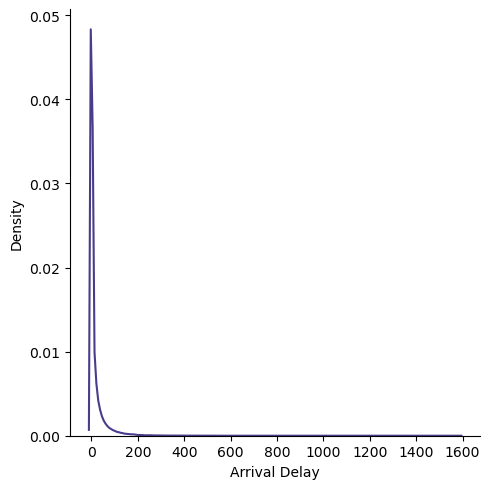

In [28]:
sns.displot(data = data , x = "Arrival Delay" ,  kind="kde", color = 'DarkSlateBlue')

In [29]:
fill_list = data['Arrival Delay'].dropna()
data['Arrival Delay'] = data['Arrival Delay'].fillna(pd.Series(np.random.choice(fill_list , size = len(data.index))))

### After preprocessing

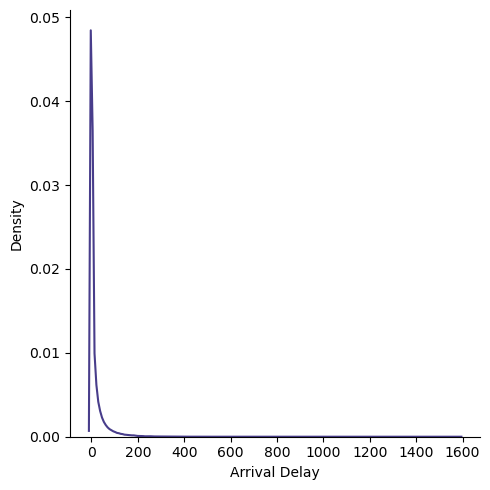

In [30]:
sns.displot(data = data , x = "Arrival Delay" ,  kind="kde", color = 'DarkSlateBlue')

### We notice that there is no difference between the distribution before and after 

In [31]:
data.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

### There are no longer null values

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">5.2 Checking if there are Outliers in data</p>

In [32]:
df = data.copy()
df.drop('ID',axis=1,inplace=True)
# we take a copy of data and then drop "ID" column Because it is an unimportant column

In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Departure Delay,129880.0,14.713713,38.071126,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129880.0,15.090722,38.447111,0.0,0.00,0.0,13.00,1584.0
Departure and Arrival Time Convenience,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Check-in Service,129880.0,3.306267,1.266185,0.0,3.00,3.0,4.00,5.0
Online Boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0


In [34]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.090722,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.447111,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


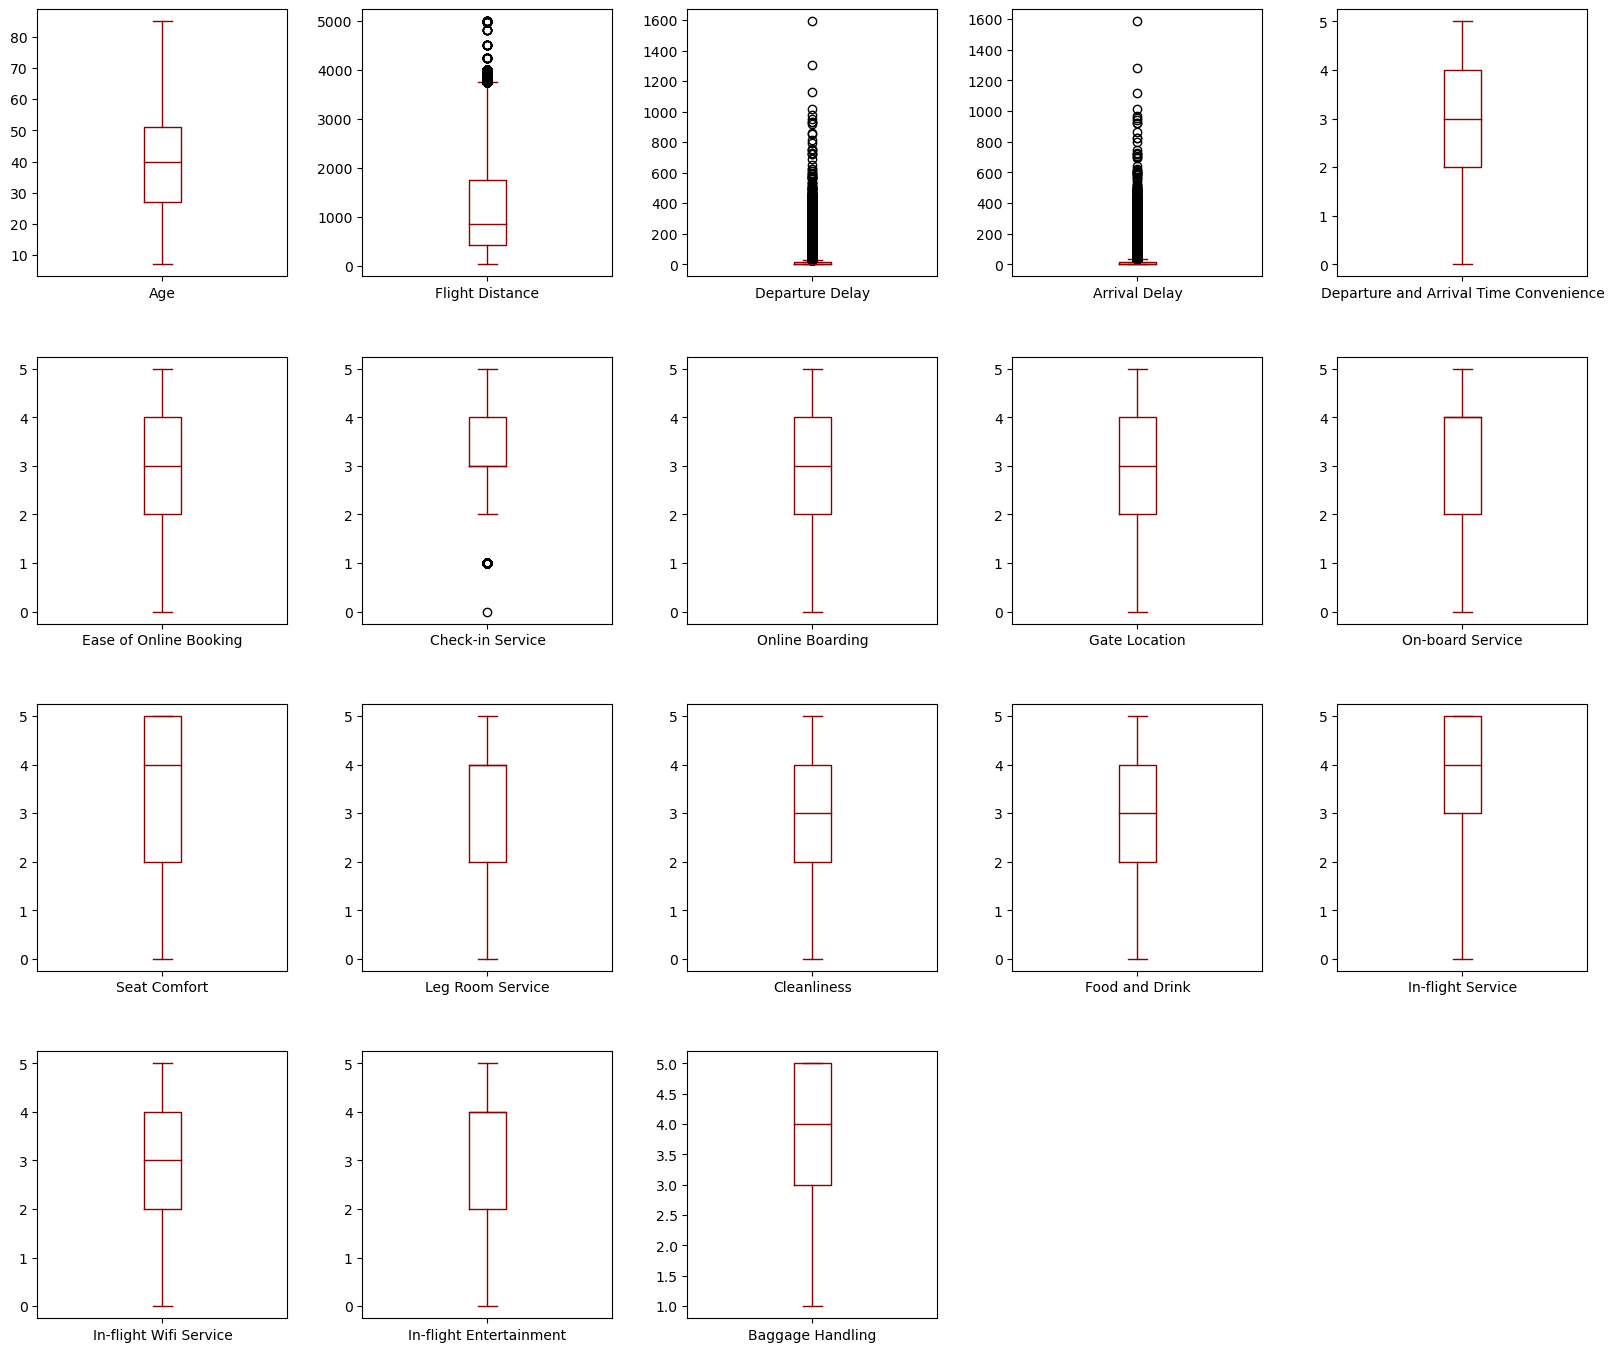

In [35]:
df.plot(subplots =True, kind = 'box', layout = (4,5), figsize = (20,17), color = 'DarkRed')
plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

### There are outilers in (" Flight Distance "," Departure Delay ","Arrival Delay ")

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">Outlier preprocessing</p>

In [36]:
def comp(data, col, color):
    plt.figure(figsize=(24,8))
    plt.subplot(1,2,1) #to make the 2 graphs next to each other
    sns.boxplot(data = df,x=col, color = color )
    plt.subplot(1,2,2) #to make the 2 graphs next to each other
    sns.scatterplot(x=df[col],y=df['Satisfaction'], color = color)
    
## Satisfaction is the target    

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">5.2.1 Flight distance</p>

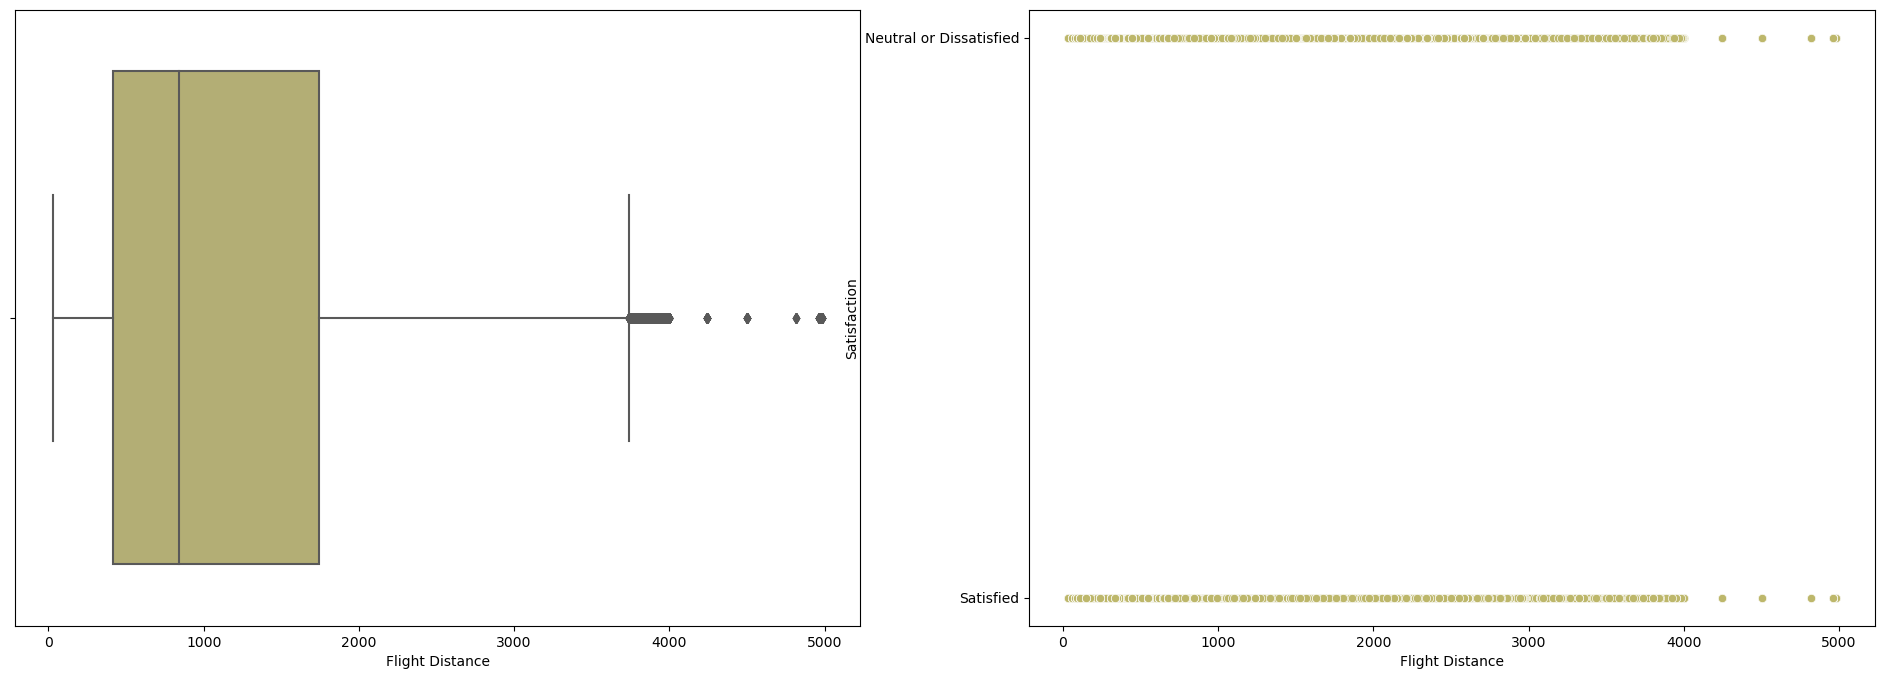

In [37]:
comp (df, 'Flight Distance','DarkKhaki')

In [38]:
df[df['Flight Distance']>=4100].shape

(78, 23)

In [39]:
df = df[df['Flight Distance']<4100]
df.shape

(129802, 23)

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">5.2.2 Departure Delay</p>

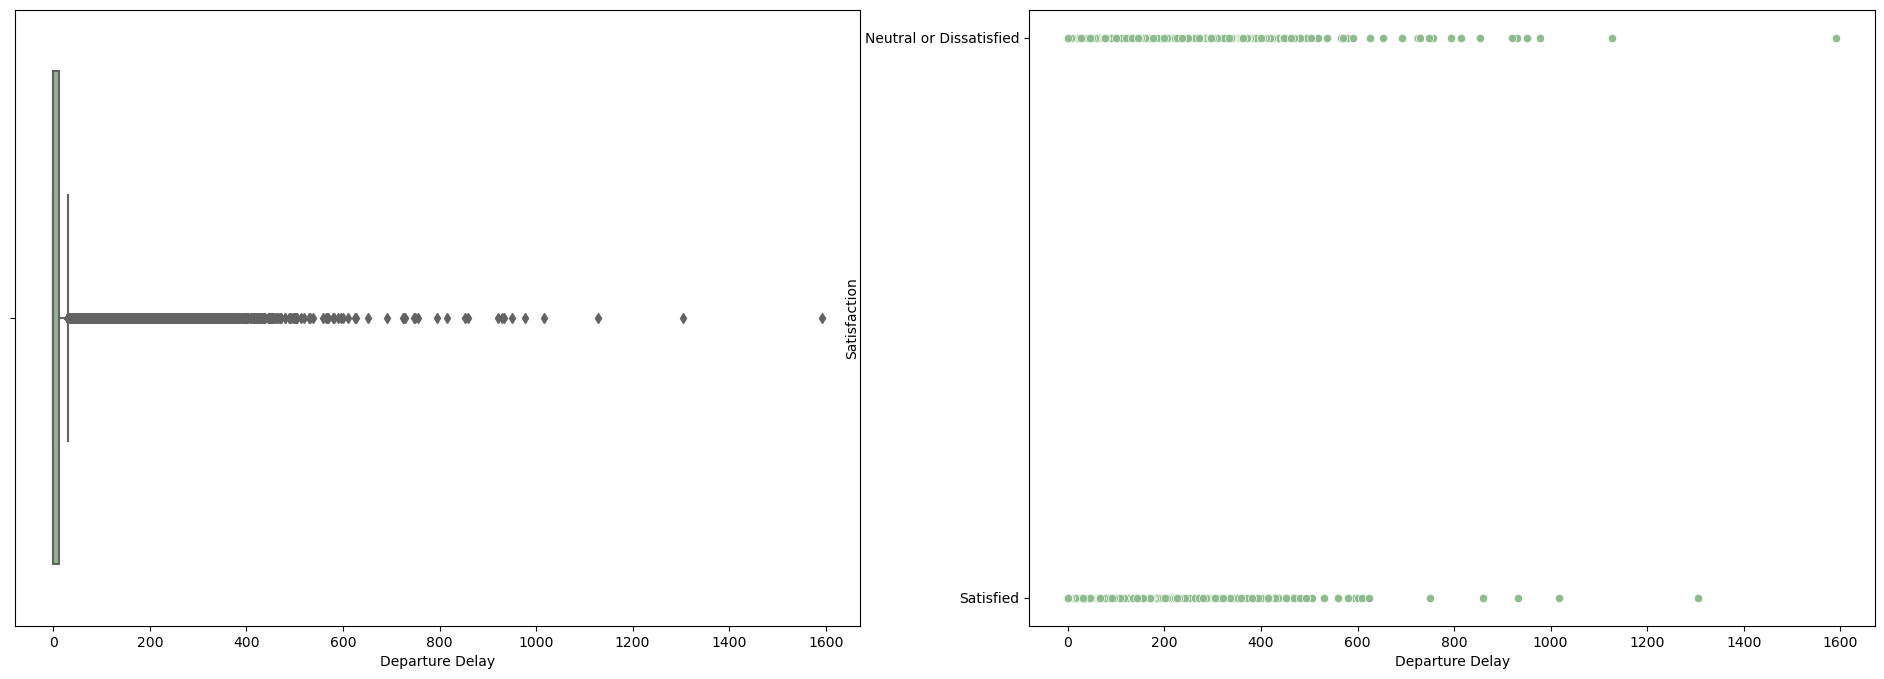

In [40]:
comp (df, 'Departure Delay','DarkSeaGreen')

In [41]:
df[df['Departure Delay']>=615].shape

(23, 23)

In [42]:
df = df[df['Departure Delay']<615]
df.shape

(129779, 23)

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">5.2.3 Arrival Delay</p>

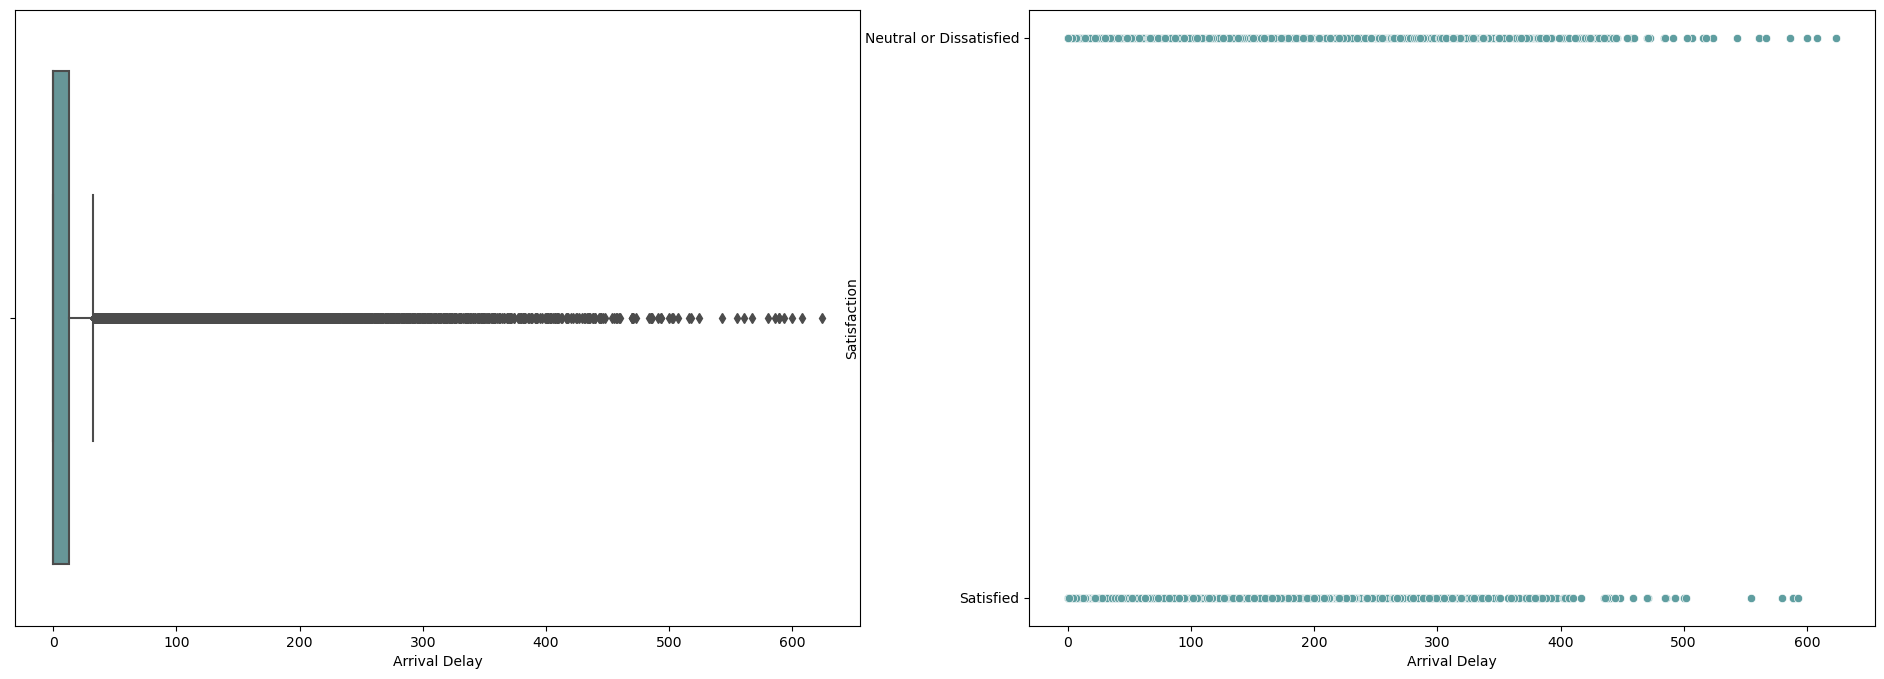

In [43]:
comp (df, 'Arrival Delay','CadetBlue')

In [44]:
df[df['Arrival Delay']>=515].shape

(15, 23)

In [45]:
df = df[df['Arrival Delay']<515]
df.shape

(129764, 23)

In [46]:
nr, nc = data.shape
nr2, nc2 = df.shape
nr - nr2

116

### 116 outliers have been removed by comparing with the target 

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">6. Encoding(converting categorical data into numerical data)</p>

In [47]:
#['Gender', 'Customer Type','Type of Travel','Class','Satisfaction'  ]
#these are the categorical data

### The data Before

In [48]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied


### Preprocessing 

In [49]:
for data in df.columns:
    if df[data].dtype=='object':
        
        l_en=LabelEncoder()  ##converting line ##important
        df[data] = l_en.fit_transform(df[data]) ##converting line ##important

###  After encoding

In [50]:
df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,0
1,0,35,1,0,0,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,1
2,1,41,1,0,0,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,1
3,1,50,1,0,0,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,1
4,0,49,1,0,0,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,28,1,1,2,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,0
129876,1,41,1,1,2,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,0
129877,1,42,1,1,2,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,0
129878,1,50,1,1,2,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,1


In [51]:
df.dtypes

Gender                                      int32
Age                                         int64
Customer Type                               int32
Type of Travel                              int32
Class                                       int32
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


### We notice that there are no more categorical values

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">7. Splitting data into train and testing sets</p>

In [52]:
#Satisfaction is the target so we will spilt with it
x = df.drop(['Satisfaction'] , axis = 1).values
y= df['Satisfaction' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">8. Data Scaling using Robust Scaler</p>

https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [53]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
r, c = x_train.shape
r2 ,c2 = x_test.shape
print (f"x_train = {r} and y_train = {y_train.shape} ")
print (f"x_test = {r2} and y_test = {y_test.shape} ")

x_train = 97323 and y_train = (97323,) 
x_test = 32441 and y_test = (32441,) 


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">9. Modeling </p>

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">9.1 Logistic Regression</p>

https://medium.com/analytics-vidhya/how-to-improve-logistic-regression-b956e72f4492

https://www.analyticsvidhya.com/blog/2021/06/5-hyperparameter-optimization-techniques-you-must-know-for-data-science-hackathons/

In [54]:
# Since we are not limited to time we have taken grid search(is a brute force CV model), other wise random search would be a faster approach 
#and Genetic algorithms would be a newer approach

Train accuracy is: 0.8747058763087862
Test accuracy is: 0.8741715730094634

Train ROC is: 0.8700853887425787
Test ROC is: 0.8695574196429513

F1 score of LogisticRegression(random_state=0) is: 0.8525928065867399
Precision of LogisticRegression(random_state=0) is: 0.8730863101841579
Recall of LogisticRegression(random_state=0) is: 0.8330393056241621
confusion matrix of LogisticRegression(random_state=0) is: 


best features are of model are: <bound method BaseEstimator.get_params of LogisticRegression(random_state=0)>


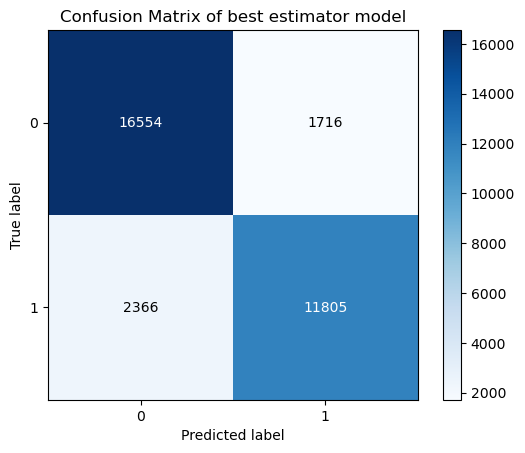

In [55]:
#CONSTRUCT DEFAULT Logistic Regression AND OBTAIN RESPECTIVE ACCURACY 

LR = LogisticRegression(random_state=0,)
LR.fit(x_train, y_train)
LR_1_accuracy,LR_1_f1,LR_1_precision,LR_1_recall,LR_1_roc=classifier(LR, x_train,x_test,y_train,y_test,'DT_base_wo_smote')


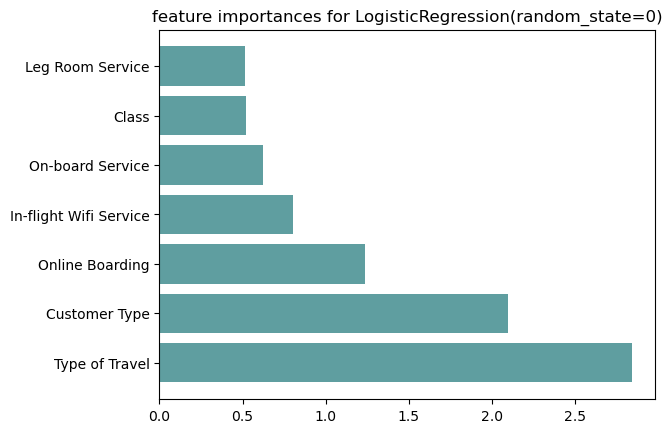

In [56]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(LR))
    plt.show()

# whatever your features are called
features_names = df.columns

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(LR.coef_[0]), features_names, top=7)

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}

Best estimator is:  LogisticRegression(C=0.1, random_state=0, solver='newton-cg')

Scores and accuracies are:
Train accuracy is: 0.8748189020067199
Test accuracy is: 0.8741407478191178

Train ROC is: 0.8701768418914634
Test ROC is: 0.8695063042051427

F1 score of LogisticRegression(C=0.1, random_state=0, solver='newton-cg') is: 0.8525300682630838
Precision of LogisticRegression(C=0.1, random_state=0, solver='newton-cg') is: 0.8731873335306304
Recall of LogisticRegression(C=0.1, random_state=0, solver='newton-cg') is: 0.8328276056735586
confusion matrix of LogisticRegression(C=0.1, random_state=0, solver='newton-cg') is: 


best features are of model are: <bound method BaseEstimator.get_params of LogisticRegression(C=0.1, rando

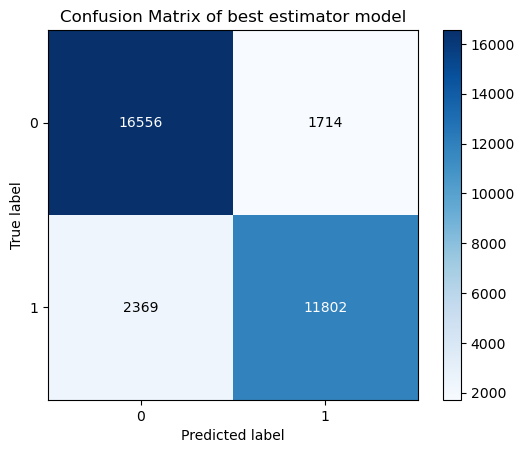

In [58]:
#Hyperparameter tuning done for Logistic regression
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

print('-'*100)
print('Random search results are: ')
LR_2_accuracy,LR_2_f1,LR_2_precision,LR_2_recall,LR_2_roc=random_search(LogisticRegression(random_state=0),parameters, x_train,x_test,y_train,y_test,'DT_basehyperparam_wo_sm')


In [59]:
LR.predict(x_test)

array([1, 0, 1, ..., 0, 1, 0])

In [60]:
Y_pred = LR.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,0
7,0,0
8,0,0
9,0,0


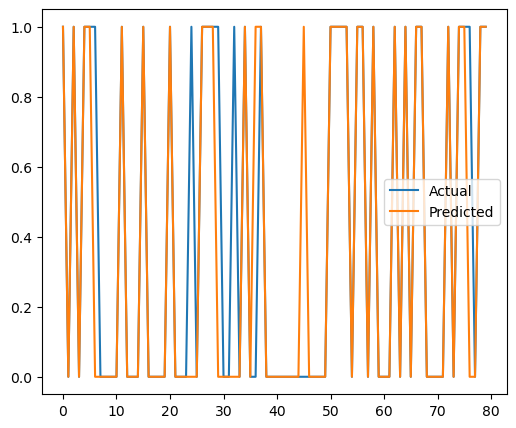

In [61]:
plt.figure(figsize=(6,5))
plt.plot(data[:80])
plt.legend(['Actual' , 'Predicted'])

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">9.2 Decision Tree</p>

Train accuracy is: 1.0
Test accuracy is: 0.9454702382787213

Train ROC is: 1.0
Test ROC is: 0.9450565550952694

F1 score of DecisionTreeClassifier(random_state=0) is: 0.9378447700361898
Precision of DecisionTreeClassifier(random_state=0) is: 0.9339398180545836
Recall of DecisionTreeClassifier(random_state=0) is: 0.9417825135840802
confusion matrix of DecisionTreeClassifier(random_state=0) is: 


best features are of model are: <bound method BaseEstimator.get_params of DecisionTreeClassifier(random_state=0)>


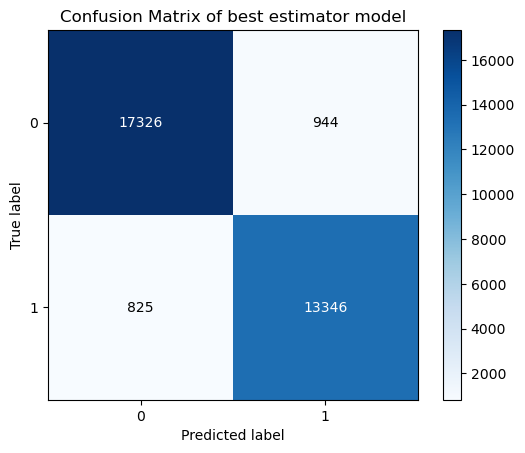

In [62]:
#CONSTRUCT DEFAULT DECISION TREE AND OBTAIN RESPECTIVE ACCURACY 

dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)
DT_1_accuracy,DT_1_f1,DT_1_precision,DT_1_recall,DT_1_roc=classifier(dtree, x_train,x_test,y_train,y_test,'DT_base_wo_smote')

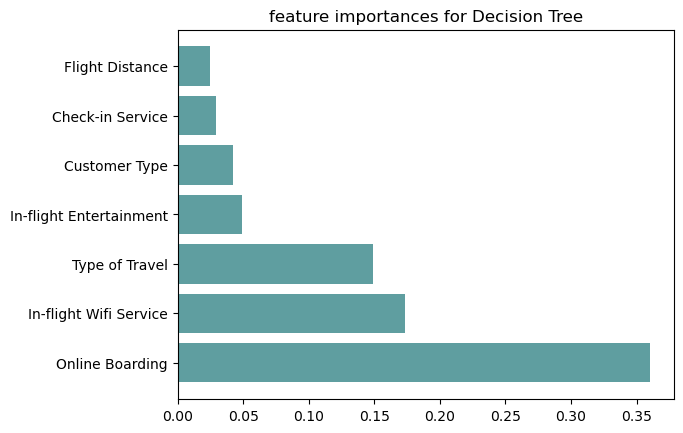

In [63]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

# whatever your features are called
features_names = df.columns

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(dtree.feature_importances_), features_names, top=7)

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'min_samples_split': 50, 'max_depth': 3}

Best estimator is:  DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=0)

Scores and accuracies are:
Train accuracy is: 0.8832855542882977
Test accuracy is: 0.8881662094263432

Train ROC is: 0.8859333885717958
Test ROC is: 0.8906106610797347

F1 score of DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=0) is: 0.8766741450812429
Precision of DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=0) is: 0.8457401456024136
Recall of DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=0) is: 0.9099569543433773
confusion matrix of DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=0) is: 


best features are of model are: <bound method BaseEsti

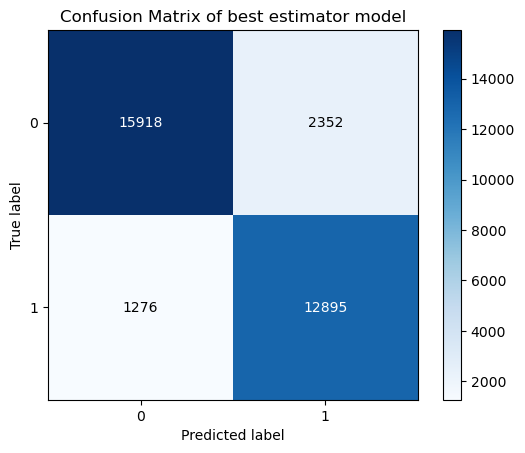

In [64]:
#Hyperparameter tuning done for decision tree classifier
parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,5,2)}

print('-'*100)
print('Random search results are: ')
DT_2_accuracy,DT_2_f1,DT_2_precision,DT_2_recall,DT_2_roc=random_search(DecisionTreeClassifier(random_state=0),parameters, x_train,x_test,y_train,y_test,'DT_basehyperparam_wo_sm')


In [65]:
Y_pred = dtree.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,0
7,0,0
8,0,0
9,0,0


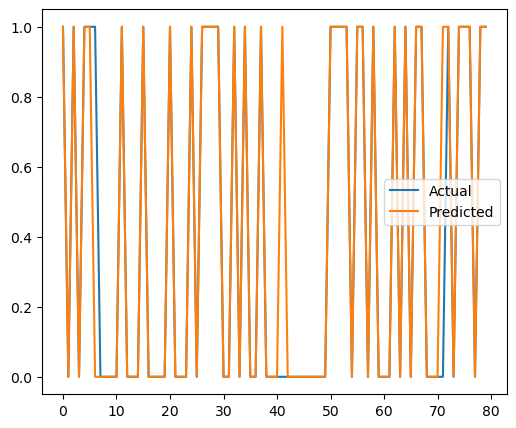

In [66]:
plt.figure(figsize=(6,5))
plt.plot(data[:80])
plt.legend(['Actual' , 'Predicted'])

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">9.3 Random Forest</p>

Train accuracy is: 1.0
Test accuracy is: 0.9651983600998736

Train ROC is: 1.0
Test ROC is: 0.9627299282201597

F1 score of RandomForestClassifier(random_state=0) is: 0.9594774056925451
Precision of RandomForestClassifier(random_state=0) is: 0.9763330898466034
Recall of RandomForestClassifier(random_state=0) is: 0.9431938465881025
confusion matrix of RandomForestClassifier(random_state=0) is: 


best features are of model are: <bound method BaseEstimator.get_params of RandomForestClassifier(random_state=0)>


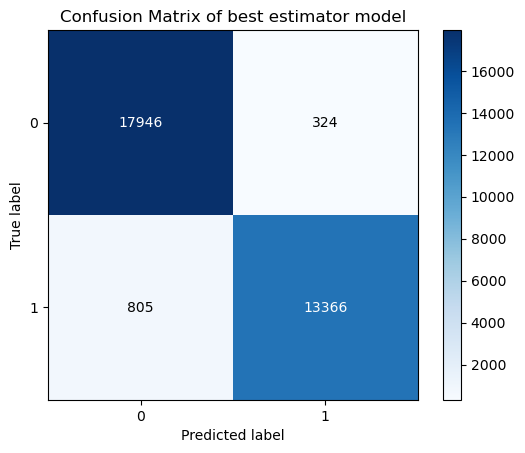

In [67]:
#Construct Random Forest Model

rftree = RandomForestClassifier(random_state=0,)
rftree.fit(x_train, y_train)
RF_1_accuracy,RF_1_f1,RF_1_precision,RF_1_recall,RF_1_roc=classifier(rftree, x_train,x_test,y_train,y_test,'RF_base_wo_smote')

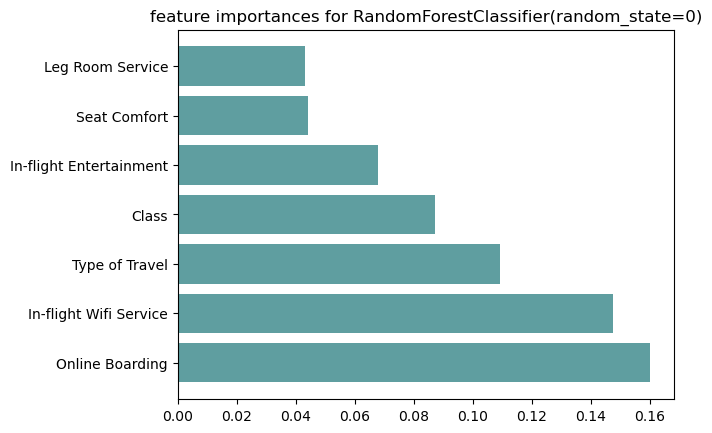

In [68]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(rftree))
    plt.show()

# whatever your features are called
features_names = df.columns

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(rftree.feature_importances_), features_names, top=7)

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'min_samples_split': 10, 'max_depth': 9}

Best estimator is:  RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0)

Scores and accuracies are:
Train accuracy is: 0.9433330250814299
Test accuracy is: 0.9437748528097161

Train ROC is: 0.9412605017159615
Test ROC is: 0.9416356696765449

F1 score of RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0) is: 0.934931506849315
Precision of RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0) is: 0.9453863357622105
Recall of RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0) is: 0.9247053842354104
confusion matrix of RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0) is: 


best features are of model are: <bound method BaseEstim

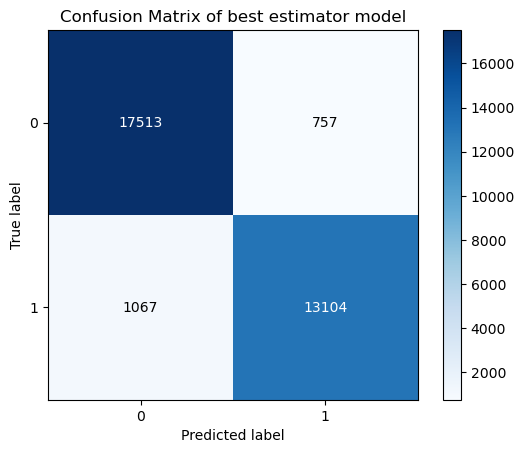

In [69]:
#Hyperparameter tuning for random forest classifier

parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,10,2)}

print('-'*100)
print('Random search results are: ')
RF_2_accuracy,RF_2_f1,RF_2_precision,RF_2_recall,RF_2_roc=random_search(RandomForestClassifier(random_state=0),parameters, x_train,x_test,y_train,y_test,'RF_basehyperparam_wo_sm')


In [70]:
Y_pred = rftree.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,0
7,0,0
8,0,0
9,0,0


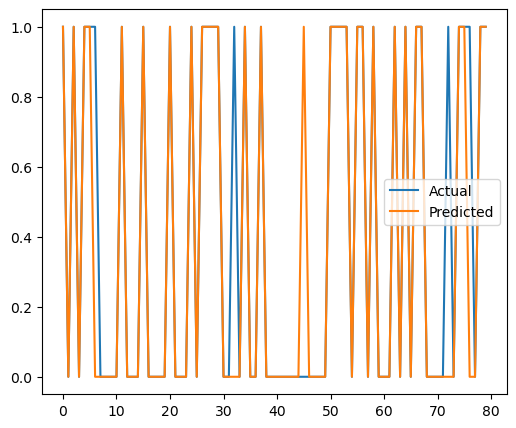

In [71]:
plt.figure(figsize=(6,5))
plt.plot(data[:80])
plt.legend(['Actual' , 'Predicted'])

In [72]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">9.4 Gradient Boosting</p>

Train accuracy is: 0.9419150663255346
Test accuracy is: 0.942202768102093

Train ROC is: 0.9393978835775678
Test ROC is: 0.9396462347439208

F1 score of GradientBoostingClassifier(random_state=15) is: 0.9328750939748685
Precision of GradientBoostingClassifier(random_state=15) is: 0.9467373928208109
Recall of GradientBoostingClassifier(random_state=15) is: 0.9194128854703267
confusion matrix of GradientBoostingClassifier(random_state=15) is: 


best features are of model are: <bound method BaseEstimator.get_params of GradientBoostingClassifier(random_state=15)>


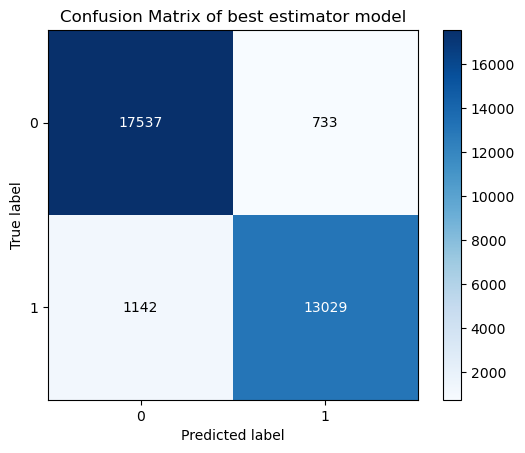

In [73]:
# gradient boosting with default parameters 
GB = GradientBoostingClassifier(random_state=15)
    
GB.fit(x_train, y_train)
GB_1_accuracy,GB_1_f1,GB_1_precision,GB_1_recall,GB_1_roc=classifier(GB, x_train,x_test,y_train,y_test,'RF_base_wo_smote')

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'n_estimators': 80, 'min_samples_split': 1200, 'min_samples_leaf': 70, 'max_features': 9, 'max_depth': 11}

Best estimator is:  GradientBoostingClassifier(max_depth=11, max_features=9, min_samples_leaf=70,
                           min_samples_split=1200, n_estimators=80,
                           random_state=0)

Scores and accuracies are:
Train accuracy is: 0.9663286170792105
Test accuracy is: 0.964766807435036

Train ROC is: 0.9636467252738998
Test ROC is: 0.9622042974433359

F1 score of GradientBoostingClassifier(max_depth=11, max_features=9, min_samples_leaf=70,
                           min_samples_split=1200, n_estimators=80,
                           random_state=0) is: 0.9589424907503862
Precision of GradientBoostingClassifier(max_depth=11, max_features=9, min_sam

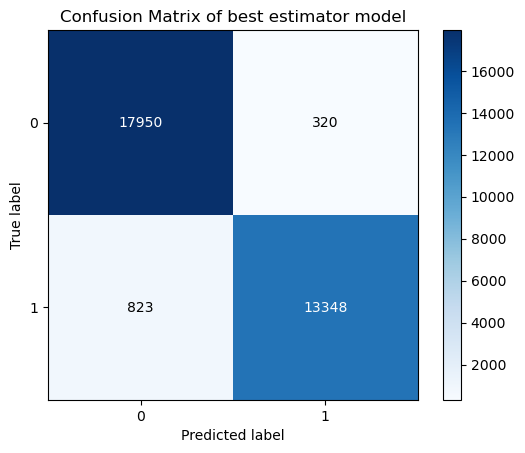

In [74]:
# Hyperparameter tuning for Gradient boosting 
parameters = {'n_estimators':range(20,81,10),
 'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200),
 'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10),
 'max_features':range(7,20,2)}

print('-'*100)
print('Random search results are: ')
GB_2_accuracy,GB_2_f1,GB_2_precision,GB_2_recall,GB_2_roc=random_search(GradientBoostingClassifier(random_state=0),parameters, x_train,x_test,y_train,y_test,'RF_basehyperparam_wo_sm')


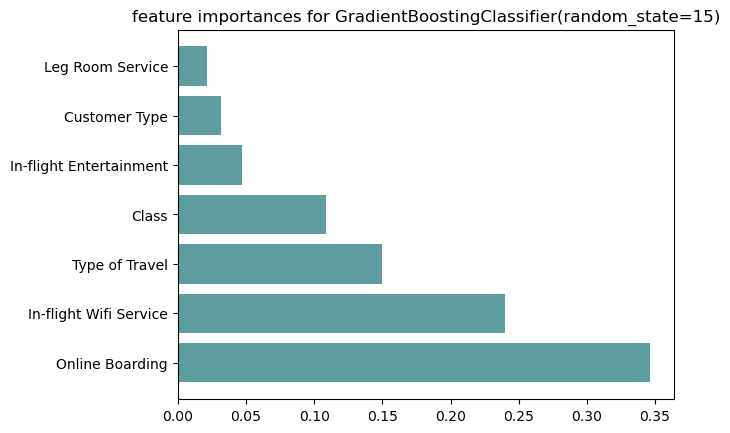

In [75]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(GB))
    plt.show()

# whatever your features are called
features_names = df.columns

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(GB.feature_importances_), features_names, top=7)

In [76]:
Y_pred = GB.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,0
7,0,1
8,0,0
9,0,0


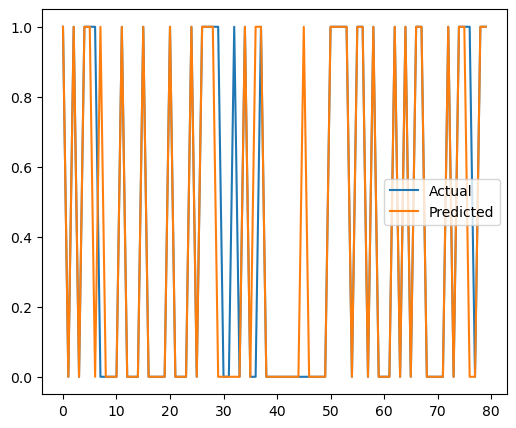

In [77]:
plt.figure(figsize=(6,5))
plt.plot(data[:80])
plt.legend(['Actual' , 'Predicted'])

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">9.5 XGBM (Extreme Gradient Boosting)</p>

Train accuracy is: 0.9748260945511339
Test accuracy is: 0.9637804013439782

Train ROC is: 0.9729226472319995
Test ROC is: 0.9616689352666664

F1 score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=15, ...) is: 0.9579711700110884
Precision of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel

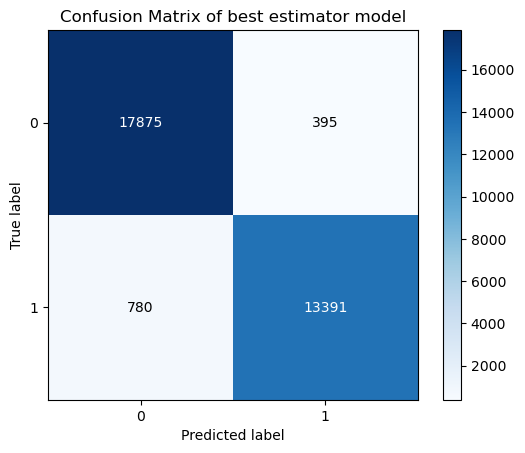

In [78]:
# gradient boosting with default parameters 
XGB = XGBClassifier(random_state=15)
    
XGB.fit(x_train, y_train)
XGB_1_accuracy,XGB_1_f1,XGB_1_precision,XGB_1_recall,XGB_1_roc=classifier(XGB, x_train,x_test,y_train,y_test,'RF_base_wo_smote')

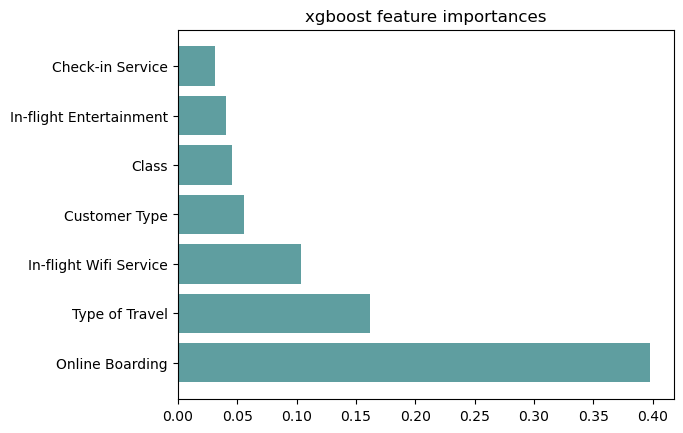

In [79]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center',color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('xgboost feature importances')
    plt.show()

features_names = df.columns
f_importances(abs(XGB.feature_importances_), features_names, top=7)

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[21:01:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Best parameters are:  {'n_estimators': 60, 'min_samples_split': 2000, 'min_samples_leaf': 70, 'max_features': 15, 'max_depth': 7}

Best estimator is:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
       

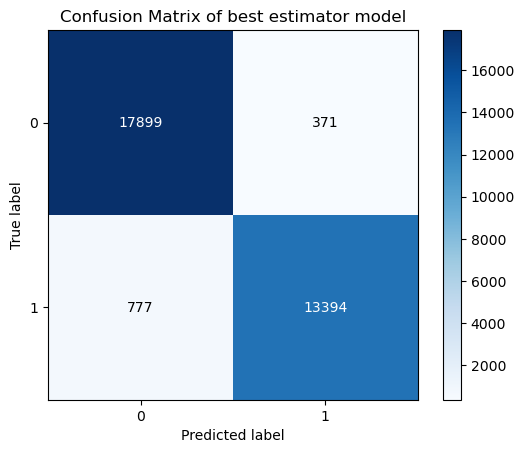

In [79]:
# Hyperparameter tuning for XGBM  
parameters = {'n_estimators':range(20,81,10),
 'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200),
 'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10),
 'max_features':range(7,20,2)}

print('-'*100)
print('Random search results are: ')
XGB_2_accuracy,XGB_2_f1,XGB_2_precision,XGB_2_recall,XGB_2_roc=random_search(XGBClassifier(random_state=0),parameters, x_train,x_test,y_train,y_test,'RF_basehyperparam_wo_sm')


In [80]:
Y_pred = XGB.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,0
7,0,0
8,0,0
9,0,0


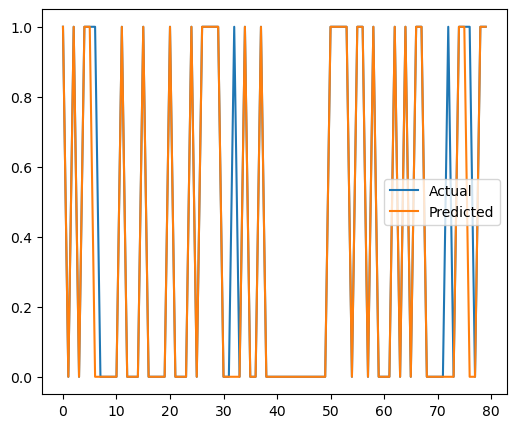

In [81]:
plt.figure(figsize=(6,5))
plt.plot(data[:80])
plt.legend(['Actual' , 'Predicted'])

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">9.6 Adaboost</p>

Train accuracy is: 0.9276943785127874
Test accuracy is: 0.9287321599210875

Train ROC is: 0.9255496631252217
Test ROC is: 0.9267288954828343

F1 score of AdaBoostClassifier(random_state=15) is: 0.9178043230944256
Precision of AdaBoostClassifier(random_state=15) is: 0.924840581786917
Recall of AdaBoostClassifier(random_state=15) is: 0.9108743207959918
confusion matrix of AdaBoostClassifier(random_state=15) is: 


best features are of model are: <bound method BaseEstimator.get_params of AdaBoostClassifier(random_state=15)>


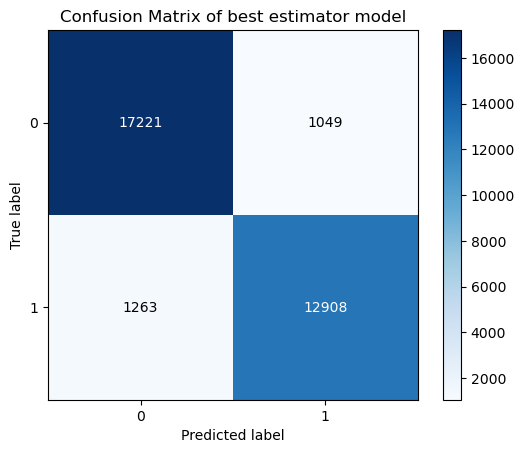

In [82]:
# gradient boosting with default parameters 
AB = AdaBoostClassifier(random_state=15)
    
AB.fit(x_train, y_train)
AB_1_accuracy,AB_1_f1,AB_1_precision,AB_1_recall,AB_1_roc=classifier(AB, x_train,x_test,y_train,y_test,'RF_base_wo_smote')

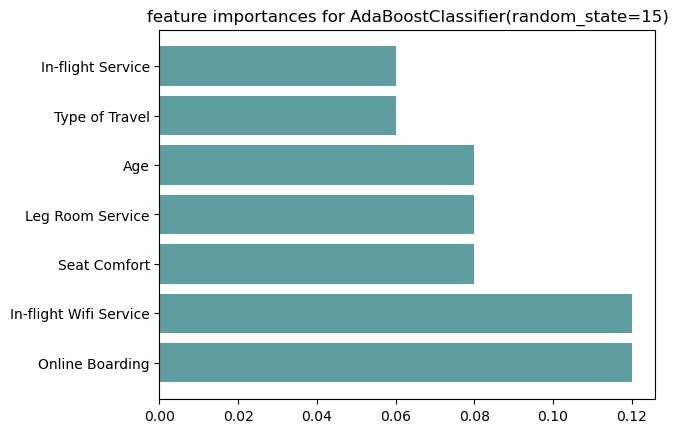

In [83]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center', color = 'CadetBlue')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for {}'.format(AB))
    plt.show()

# whatever your features are called
features_names = df.columns

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(AB.feature_importances_), features_names, top=7)

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'n_estimators': 40, 'learning_rate': 1.0, 'base_estimator': RandomForestClassifier(random_state=0)}

Best estimator is:  AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   n_estimators=40, random_state=0)

Scores and accuracies are:
Train accuracy is: 1.0
Test accuracy is: 0.9640578280570883

Train ROC is: 1.0
Test ROC is: 0.9616302626566423

F1 score of AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   n_estimators=40, random_state=0) is: 0.9581719041469364
Precision of AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   n_estimators=40, random_state=0) is: 0.974461875228019
Recall of AdaBoostClassifier(base_estimator=RandomForestClassifier(random_stat

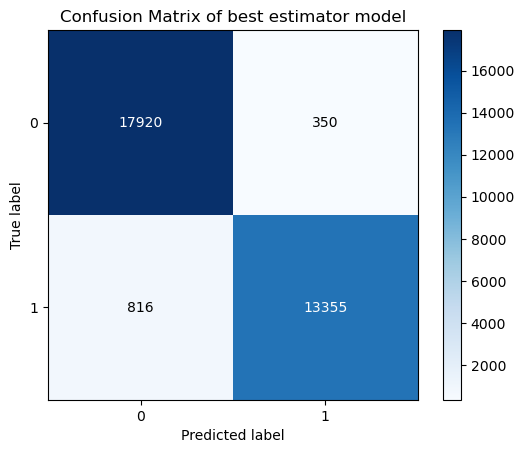

In [84]:
# Hyperparameter tuning for Adaboost 

parameters={'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
            'base_estimator':[RandomForestClassifier(random_state=0),DecisionTreeClassifier(random_state=0)]  ,
            'n_estimators':range(20,81,10),
           }

print('-'*100)
print('Random search results are: ')
AB_2_accuracy,AB_2_f1,AB_2_precision,AB_2_recall,AB_2_roc=random_search(AdaBoostClassifier(random_state=0),parameters, x_train,x_test,y_train,y_test,'RF_basehyperparam_wo_sm')


In [85]:
Y_pred = AB.predict(x_test)
data = pd.DataFrame({"Y_test" : y_test , "Y_pred": Y_pred})
data.head(10)

,Y_test,Y_pred
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,1,0
7,0,0
8,0,0
9,0,0


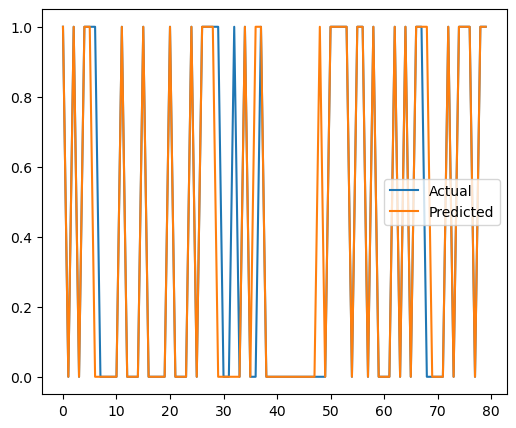

In [86]:
plt.figure(figsize=(6,5))
plt.plot(data[:80])
plt.legend(['Actual' , 'Predicted'])

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">Final Comparison of all models</p>

### Default parameter table

In [87]:
models_initial = pd.DataFrame({
    'Model'       : [ 'Logistic Regression ','Decision Tree', 'Random Forest','GBM','XGBM','Adaboost' ],
    
    'Accuracy'    : [ LR_1_accuracy, DT_1_accuracy, RF_1_accuracy, GB_1_accuracy, XGB_1_accuracy,AB_1_accuracy,] ,
    'Precision'   : [ LR_1_precision,DT_1_precision,  RF_1_precision, GB_1_precision, XGB_1_precision, AB_1_precision,],
    'Recall'      : [ LR_1_recall, DT_1_recall,  RF_1_recall, GB_1_recall, XGB_1_recall, AB_1_recall],
    'F1_score'    : [ LR_1_f1, DT_1_f1,  RF_1_f1, GB_1_f1, XGB_1_f1,AB_1_f1],
    'AUC_ROC'     : [ LR_1_roc, DT_1_roc, RF_1_roc, GB_1_roc, XGB_1_roc, AB_1_roc],
    
    }, columns = ['Model' , 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC',])

models_initial.sort_values(by='AUC_ROC', ascending=False,inplace=True);
models_initial.to_csv('Models comparison default.csv',index=False)

In [88]:
pd.read_csv('Models comparison default.csv',)


,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,XGBM,0.964304,0.972616,0.944887,0.958551,0.962126
1,Random Forest,0.964181,0.975024,0.942135,0.958297,0.961708
2,Decision Tree,0.945501,0.934309,0.941430,0.937856,0.945044
3,GBM,0.942696,0.947254,0.920048,0.933453,0.940155
4,Adaboost,0.928732,0.924841,0.910874,0.917804,0.926729
5,Logistic Regression,0.874202,0.873151,0.833039,0.852624,0.869585


In [89]:
col_names = ["model", "Accuracy", "Precision","Recall","F1_score","AUC_ROC_score",]
print(tabulate(models_initial,headers=col_names,tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╕
│    │ model               │   Accuracy │   Precision │   Recall │   F1_score │   AUC_ROC_score │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╡
│  4 │ XGBM                │   0.964304 │    0.972616 │ 0.944887 │   0.958551 │        0.962126 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  2 │ Random Forest       │   0.964181 │    0.975024 │ 0.942135 │   0.958297 │        0.961708 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  1 │ Decision Tree       │   0.945501 │    0.934309 │ 0.94143  │   0.937856 │        0.945044 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  3 │ GBM                 │   0.942696 │    0.947254 │ 0.920048 │   0.933453 │        0.940155 │
├────┼──────────────

### Hyperparameter table

In [94]:
models_initial_hyper = pd.DataFrame({
    'Model'       : [ 'Logistic Regression ','Decision Tree', 'Random Forest','GBM','XGBM','Adaboost' ],
    
    'Accuracy'    : [ LR_2_accuracy, DT_2_accuracy, RF_2_accuracy, GB_2_accuracy, XGB_2_accuracy,AB_2_accuracy,] ,
    'Precision'   : [ LR_2_precision,DT_2_precision,  RF_2_precision, GB_2_precision, XGB_2_precision, AB_2_precision,],
    'Recall'      : [ LR_2_recall, DT_2_recall,  RF_2_recall, GB_2_recall, XGB_2_recall, AB_2_recall],
    'F1_score'    : [ LR_2_f1, DT_2_f1,  RF_2_f1, GB_2_f1, XGB_2_f1,AB_2_f1],
    'AUC_ROC'     : [ LR_2_roc, DT_2_roc, RF_2_roc, GB_2_roc, XGB_2_roc, AB_2_roc],
    'Difference'        : [abs(LR_2_roc-LR_1_roc),abs(DT_2_roc-DT_1_roc),abs(RF_2_roc-RF_1_roc),abs(GB_2_roc-GB_1_roc),abs(XGB_2_roc-XGB_1_roc),abs(AB_2_roc-AB_1_roc)]
    }, columns = ['Model' , 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC','Difference'])

models_initial_hyper.sort_values(by='AUC_ROC', ascending=False,inplace=True);
models_initial_hyper.to_csv('Models comparison with hyper.csv',index=False)

In [96]:
pd.read_csv('Models comparison with hyper.csv',)


,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC,Difference
0,GBM,0.966308,0.978417,0.943688,0.960739,0.963771,0.023615
1,XGBM,0.964613,0.973048,0.945170,0.958906,0.962432,0.000305
2,Adaboost,0.964058,0.974462,0.942418,0.958172,0.961630,0.034901
3,Random Forest,0.943775,0.944616,0.925552,0.934987,0.941731,0.019977
4,Decision Tree,0.888166,0.845740,0.909957,0.876674,0.890611,0.054434
5,Logistic Regression,0.874233,0.873160,0.833110,0.852665,0.869620,0.000035


### Table 1

In [97]:
col_names = ["model", "Accuracy", "Precision","Recall","F1_score","AUC_ROC_score","Difference"]
print(tabulate(models_initial_hyper,headers=col_names,tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╤══════════════╕
│    │ model               │   Accuracy │   Precision │   Recall │   F1_score │   AUC_ROC_score │   Difference │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╪══════════════╡
│  3 │ GBM                 │   0.966308 │    0.978417 │ 0.943688 │   0.960739 │        0.963771 │  0.0236152   │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┼──────────────┤
│  4 │ XGBM                │   0.964613 │    0.973048 │ 0.94517  │   0.958906 │        0.962432 │  0.000305337 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┼──────────────┤
│  5 │ Adaboost            │   0.964058 │    0.974462 │ 0.942418 │   0.958172 │        0.96163  │  0.0349014   │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────

### we notice that GBM has the best scores after hyperparameter tuning 

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">10 columns of Imbalanced data (preprocess by 3 different techniques)</p>

In [98]:
X = df.drop(['Type of Travel'], axis=1)
y = df['Type of Travel']

In [99]:
y.value_counts()

0    89614
1    40150
Name: Type of Travel, dtype: int64

### we notice that we have large difference between the number of 0's and 1's

<AxesSubplot:ylabel='Type of Travel'>

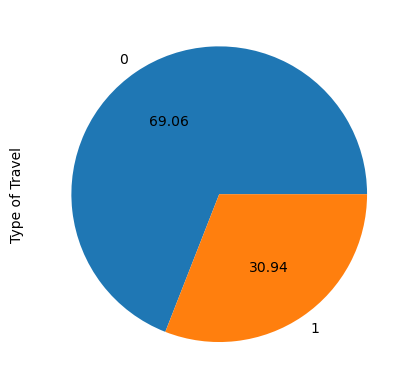

In [100]:
y.value_counts().plot.pie(autopct='%.2f')

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">10.1 Random Undersampling</p>

### (reduce the majority class be the same number (percentage) as the minority)

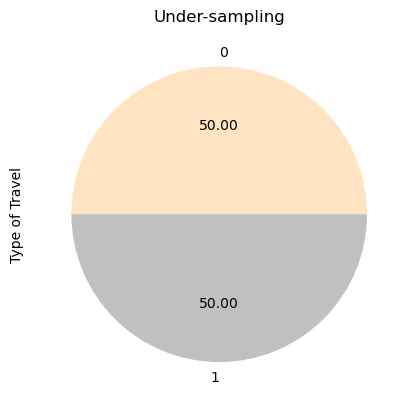

In [101]:
rus = RandomUnderSampler(sampling_strategy=1) #sampling_strategy=1 to be the same percentage
X_res, y_res = rus.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f', colors = ['Bisque', 'Silver'])
_ = ax.set_title("Under-sampling")

In [102]:
y_res.value_counts()

0    40150
1    40150
Name: Type of Travel, dtype: int64

### We notice that they are equal

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">10.2 Random Oversampling</p>

### (increase the minority class be the same number (percentage) as the majority)

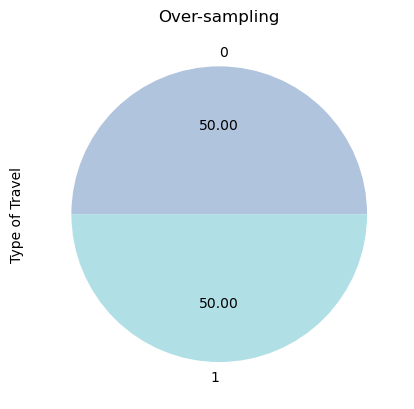

In [103]:
ros = RandomOverSampler(sampling_strategy=1) #sampling_strategy=1 to be the same percentage
X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f', colors = ['LightSteelBlue', 'PowderBlue'])
_ = ax.set_title("Over-sampling")

In [104]:
y_res.value_counts()

0    89614
1    89614
Name: Type of Travel, dtype: int64

### We notice that they are equal

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">10.3 SMOTE</p>

###  (It aims to balance class distribution by randomly increasing minority class examples by replicating them)

In [105]:
from collections import Counter #sampling_strategy=1 to be the same percentage
ros = SMOTE(sampling_strategy=1)                        
x_res, y_res = ros.fit_resample(x_train, y_train)

In [106]:
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 55120, 1: 42203})
Resampled dataset shape Counter({1: 55120, 0: 55120})


### We notice that they are equal

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">11. Modeling </p>

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">11.1 Logistic Regression</p>

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}

Best estimator is:  LogisticRegression(C=0.01, penalty='l1', random_state=0, solver='liblinear')

Scores and accuracies are:
Train accuracy is: 0.8683508708272859
Test accuracy is: 0.8692087173638298

Train ROC is: 0.8683508708272859
Test ROC is: 0.8676448471262552

F1 score of LogisticRegression(C=0.01, penalty='l1', random_state=0, solver='liblinear') is: 0.8510339500754837
Precision of LogisticRegression(C=0.01, penalty='l1', random_state=0, solver='liblinear') is: 0.8468418110676356
Recall of LogisticRegression(C=0.01, penalty='l1', random_state=0, solver='liblinear') is: 0.8552678004375133
confusion matrix of LogisticRegression(C=0.01, penalty='l1', random_state=0, solver='liblinear') is: 


best features are of model ar

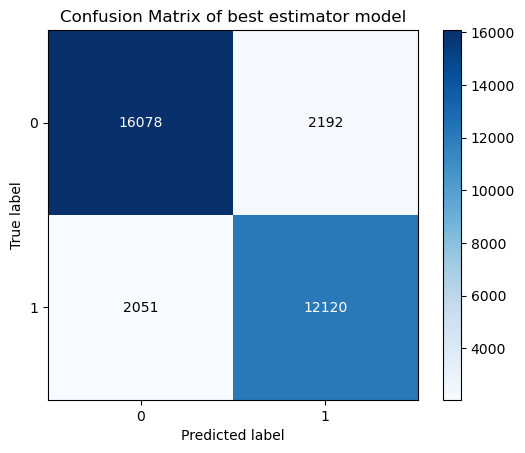

In [111]:
#Hyperparameter tuning done for Logistic regression
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    # 'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

print('-'*100)
print('Random search results are: ')
LR_4_accuracy,LR_4_f1,LR_4_precision,LR_4_recall,LR_4_roc=random_search(LogisticRegression(random_state=0),parameters, x_res,x_test,y_res,y_test,'DT_basehyperparam_wo_sm')


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">11.2 Decision Tree</p>

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'min_samples_split': 90, 'max_depth': 3}

Best estimator is:  DecisionTreeClassifier(max_depth=3, min_samples_split=90, random_state=0)

Scores and accuracies are:
Train accuracy is: 0.8895228592162554
Test accuracy is: 0.8881662094263432

Train ROC is: 0.8895228592162555
Test ROC is: 0.8906106610797347

F1 score of DecisionTreeClassifier(max_depth=3, min_samples_split=90, random_state=0) is: 0.8766741450812429
Precision of DecisionTreeClassifier(max_depth=3, min_samples_split=90, random_state=0) is: 0.8457401456024136
Recall of DecisionTreeClassifier(max_depth=3, min_samples_split=90, random_state=0) is: 0.9099569543433773
confusion matrix of DecisionTreeClassifier(max_depth=3, min_samples_split=90, random_state=0) is: 


best features are of model are: <bound method BaseEsti

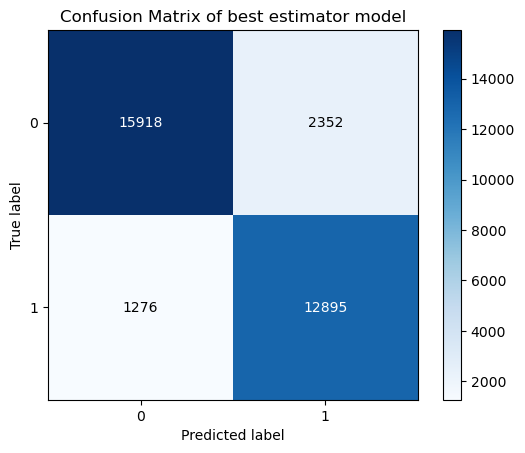

In [118]:
#Hyperparameter tuning done for decision tree classifier
parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,5,2)}

print('-'*100)
print('Random search results are: ')
DT_4_accuracy,DT_4_f1,DT_4_precision,DT_4_recall,DT_4_roc=random_search(DecisionTreeClassifier(random_state=0),parameters, x_res,x_test,y_res,y_test,'DT_basehyperparam_wo_sm')


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">11.3 Random Forest</p>

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'min_samples_split': 10, 'max_depth': 9}

Best estimator is:  RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0)

Scores and accuracies are:
Train accuracy is: 0.9445029027576197
Test accuracy is: 0.9422335932924386

Train ROC is: 0.9445029027576197
Test ROC is: 0.9407739338458705

F1 score of RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0) is: 0.9335696561503013
Precision of RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0) is: 0.9379585440558444
Recall of RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0) is: 0.9292216498482817
confusion matrix of RandomForestClassifier(max_depth=9, min_samples_split=10, random_state=0) is: 


best features are of model are: <bound method BaseEsti

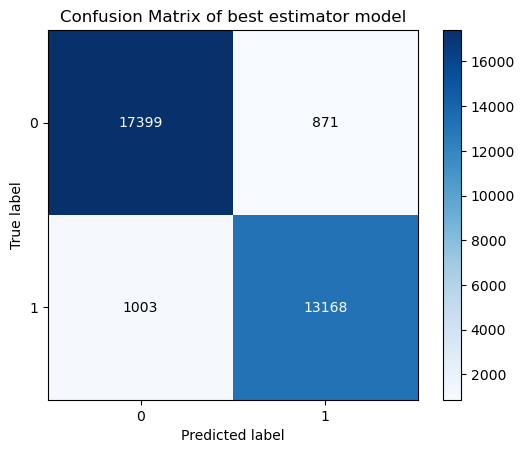

In [123]:
#Hyperparameter tuning for random forest classifier

parameters={'min_samples_split' : range(10,100,10),'max_depth': range(1,10,2)}

print('-'*100)
print('Random search results are: ')
RF_4_accuracy,RF_4_f1,RF_4_precision,RF_4_recall,RF_4_roc=random_search(RandomForestClassifier(random_state=0),parameters, x_res,x_test,y_res,y_test,'RF_basehyperparam_wo_sm')


In [126]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">11.4 Gradient Boosting</p>

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'n_estimators': 50, 'min_samples_split': 1000, 'min_samples_leaf': 60, 'max_features': 17, 'max_depth': 15}

Best estimator is:  GradientBoostingClassifier(max_depth=15, max_features=17, min_samples_leaf=60,
                           min_samples_split=1000, n_estimators=50,
                           random_state=0)

Scores and accuracies are:
Train accuracy is: 0.9682783018867924
Test accuracy is: 0.9643969051508893

Train ROC is: 0.9682783018867924
Test ROC is: 0.9621054558526424

F1 score of GradientBoostingClassifier(max_depth=15, max_features=17, min_samples_leaf=60,
                           min_samples_split=1000, n_estimators=50,
                           random_state=0) is: 0.9586155003762228
Precision of GradientBoostingClassifier(max_depth=15, max_features=17, mi

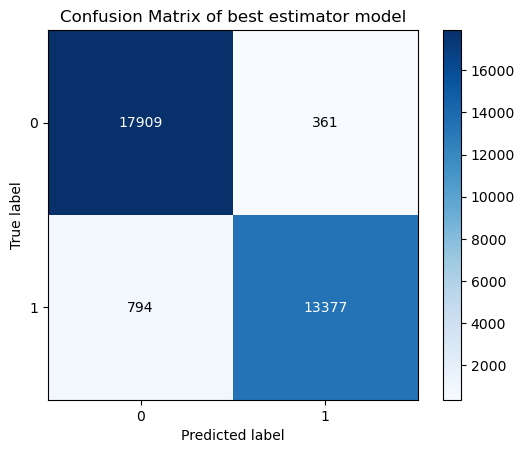

In [129]:
# Hyperparameter tuning for Gradient boosting 
parameters = {'n_estimators':range(20,81,10),
 'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200),
 'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10),
 'max_features':range(7,20,2)}

print('-'*100)
print('Random search results are: ')
GB_4_accuracy,GB_4_f1,GB_4_precision,GB_4_recall,GB_4_roc=random_search(GradientBoostingClassifier(random_state=0),parameters, x_res,x_test,y_res,y_test,'RF_basehyperparam_wo_sm')


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">11.5 XGBM (Extreme Gradient Boosting)</p>

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[21:17:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

Best parameters are:  {'n_estimators': 50, 'min_samples_split': 1000, 'min_samples_leaf': 50, 'max_features': 17, 'max_depth': 13}

Best estimator is:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
      

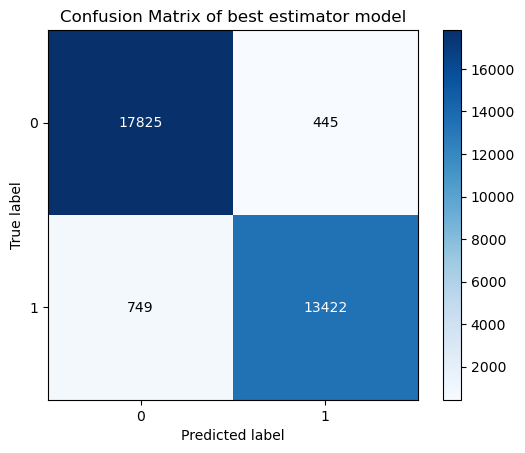

In [134]:
# Hyperparameter tuning for XGBM  
parameters = {'n_estimators':range(20,81,10),
 'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200),
 'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10),
 'max_features':range(7,20,2)}

print('-'*100)
print('Random search results are: ')
XGB_4_accuracy,XGB_4_f1,XGB_4_precision,XGB_4_recall,XGB_4_roc=random_search(XGBClassifier(random_state=0),parameters, x_res,x_test,y_res,y_test,'RF_basehyperparam_wo_sm')


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">11.6 Adaboost</p>

----------------------------------------------------------------------------------------------------
Random search results are: 
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters are:  {'n_estimators': 30, 'learning_rate': 1.0, 'base_estimator': RandomForestClassifier(random_state=0)}

Best estimator is:  AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   n_estimators=30, random_state=0)

Scores and accuracies are:
Train accuracy is: 1.0
Test accuracy is: 0.9643352547701982

Train ROC is: 1.0
Test ROC is: 0.962074469484211

F1 score of AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   n_estimators=30, random_state=0) is: 0.9585557187376867
Precision of AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=0),
                   n_estimators=30, random_state=0) is: 0.9733740724574421
Recall of AdaBoostClassifier(base_estimator=RandomForestClassifier(random_stat

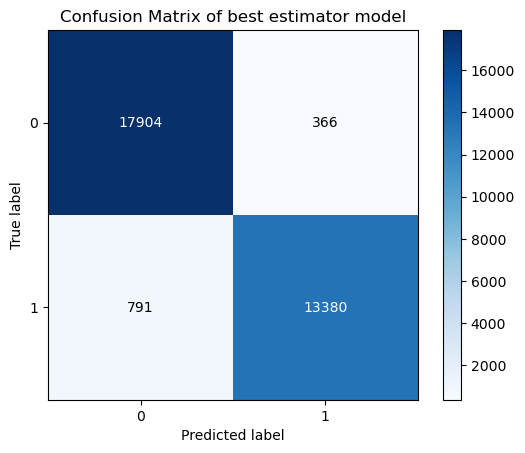

In [139]:
# Hyperparameter tuning for Adaboost 
parameters={'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
            'base_estimator':[RandomForestClassifier(random_state=0),DecisionTreeClassifier(random_state=0)]  ,
            'n_estimators':range(20,81,10),
           }

print('-'*100)
print('Random search results are: ')
AB_4_accuracy,AB_4_f1,AB_4_precision,AB_4_recall,AB_4_roc=random_search(AdaBoostClassifier(random_state=0),parameters, x_res,x_test,y_res,y_test,'RF_basehyperparam_wo_sm')


<a id="1"></a>

# <p style="background-color:#FA8072;font-family:newtimeroman;color:#000000;font-size:120%;text-align:center;border-radius:40px 40px;">12. Final Comparison of all models</p>

## Comparison 

In [149]:
models_initial_hyper_smote = pd.DataFrame({
    'Model'       : [ 'Logistic Regression ','Decision Tree', 'Random Forest','GBM','XGBM','Adaboost' ],
    
    'Accuracy'    : [ LR_4_accuracy, DT_4_accuracy, RF_4_accuracy, GB_4_accuracy, XGB_4_accuracy,AB_4_accuracy,] ,
    'Precision'   : [ LR_4_precision,DT_4_precision,  RF_4_precision, GB_4_precision, XGB_4_precision, AB_4_precision,],
    'Recall'      : [ LR_4_recall, DT_4_recall,  RF_4_recall, GB_4_recall, XGB_4_recall, AB_4_recall],
    'F1_score'    : [ LR_4_f1, DT_4_f1,  RF_4_f1, GB_4_f1, XGB_4_f1,AB_4_f1],
    'AUC_ROC'     : [ LR_4_roc, DT_4_roc, RF_4_roc, GB_4_roc, XGB_4_roc, AB_4_roc],
    'Difference'  : [abs(LR_4_roc-LR_2_roc),abs(DT_4_roc-DT_2_roc),abs(RF_4_roc-RF_2_roc),abs(GB_4_roc-GB_2_roc),abs(XGB_4_roc-XGB_2_roc),abs(AB_4_roc-AB_2_roc)]
#     'Difference'  : [(LR_4_roc-LR_2_roc),(DT_4_roc-DT_2_roc),(RF_4_roc-RF_2_roc),(GB_4_roc-GB_2_roc),(XGB_4_roc-XGB_2_roc),(AB_4_roc-AB_2_roc)]

}, columns = ['Model' , 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC','Difference'])

models_initial_hyper_smote.sort_values(by='AUC_ROC', ascending=False,inplace=True);
models_initial_hyper_smote.to_csv('Models comparison with hyper smote.csv',index=False)

In [150]:
pd.read_csv('Models comparison with hyper smote.csv',)


,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC,Difference
0,GBM,0.964397,0.973723,0.943970,0.958616,0.962105,0.001665
1,Adaboost,0.964335,0.973374,0.944182,0.958556,0.962074,0.000444
2,XGBM,0.963195,0.967909,0.947146,0.957415,0.961394,0.001037
3,Random Forest,0.942234,0.937959,0.929222,0.933570,0.940774,0.000957
4,Decision Tree,0.888166,0.845740,0.909957,0.876674,0.890611,0.000000
5,Logistic Regression,0.869209,0.846842,0.855268,0.851034,0.867645,0.001975


### Table 2

In [151]:
col_names = ["model", "Accuracy", "Precision","Recall","F1_score","AUC_ROC_score","Difference"]
print(tabulate(models_initial_hyper_smote,headers=col_names,tablefmt="fancy_grid"))

╒════╤═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╤══════════════╕
│    │ model               │   Accuracy │   Precision │   Recall │   F1_score │   AUC_ROC_score │   Difference │
╞════╪═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╪══════════════╡
│  3 │ GBM                 │   0.964397 │    0.973723 │ 0.94397  │   0.958616 │        0.962105 │  0.00166511  │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┼──────────────┤
│  5 │ Adaboost            │   0.964335 │    0.973374 │ 0.944182 │   0.958556 │        0.962074 │  0.000444207 │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┼──────────────┤
│  4 │ XGBM                │   0.963195 │    0.967909 │ 0.947146 │   0.957415 │        0.961394 │  0.00103724  │
├────┼─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────

### we notice that GBM has the best scores 